## Importing the relevant libraries

In [ ]:
!pip install feature-engine
#!pip install scikit-learn==1.1.3
!pip install --upgrade scikit-learn
!pip install catboost
!pip install lightgbm
!pip install xgboost
!pip install dask[dataframe]





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 112.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 95.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.2.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.7 MB/s 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import gc
import joblib
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, FunctionTransformer, PowerTransformer, LabelEncoder, OneHotEncoder
from sklearn.metrics import (
    classification_report, ConfusionMatrixDisplay, PrecisionRecallDisplay,
    precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay

)
from sklearn.linear_model import LogisticRegression, Lasso, PassiveAggressiveClassifier, SGDClassifier, RidgeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from scipy.stats import probplot
from imblearn.over_sampling import BorderlineSMOTE
from feature_engine.outliers import Winsorizer
from feature_engine.selection import (
    DropConstantFeatures, DropDuplicateFeatures, DropCorrelatedFeatures
)
from sklearn.feature_selection import (
    SelectKBest, SelectPercentile, SelectFromModel, chi2, RFE, SequentialFeatureSelector
)
from collections import Counter
from sklearn.pipeline import Pipeline

warnings.filterwarnings('ignore')


## Loading the dataset

In [ ]:
df = pd.read_csv('/content/sample_data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   25       Yes  Travel_Frequently        763         Human Resources   
1   41       Yes      Travel_Rarely       1102                   Sales   
2   49        No  Travel_Frequently        279  Research & Development   
3   37       Yes      Travel_Rarely       1373  Research & Development   
4   33        No  Travel_Frequently       1392  Research & Development   

   DistanceFromHome  Education    EducationField  EmployeeCount  \
0                22          3  Technical Degree              1   
1                 1          2     Life Sciences              1   
2                 8          1     Life Sciences              1   
3                 2          2             Other              1   
4                 3          4     Life Sciences              1   

   EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0            1384  ...                         2            80   
1               1  ...                         1            80   
2               2  ...                         4            80   
3               4  ...                         2            80   
4               5  ...                         3            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 1                 28                      4               3   
1                 0                  8                      0               1   
2                 1                 10                      3               3   
3                 0                  7                      3               3   
4                 0                  8                      3               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        2   
1               6                  4                        0   
2              10                  7                        1   
3               0                  0                        0   
4               8                  7                        3   

   YearsWithCurrManager  
0                     3  
1                     5  
2                     7  
3                     0  
4                     0  

[5 rows x 35 columns]

## Data Exploration

In [ ]:
df.shape

(1473, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1473 non-null   int64  
 1   Attrition                 1473 non-null   object 
 2   BusinessTravel            1473 non-null   object 
 3   DailyRate                 1473 non-null   int64  
 4   Department                1473 non-null   object 
 5   DistanceFromHome          1473 non-null   int64  
 6   Education                 1473 non-null   int64  
 7   EducationField            1473 non-null   object 
 8   EmployeeCount             1473 non-null   int64  
 9   EmployeeNumber            1473 non-null   int64  
 10  EnvironmentSatisfaction   1473 non-null   int64  
 11  Gender                    1473 non-null   object 
 12  HourlyRate                1473 non-null   float64
 13  JobInvolvement            1473 non-null   int64  
 14  JobLevel

In [ ]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1473.000000  1473.000000       1473.000000  1473.000000         1473.0   
mean     36.921928   802.698574          9.210455     2.915139            1.0   
std       9.139618   403.209138          8.113443     1.024958            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1473.000000              1473.000000  1473.000000     1473.000000   
mean      1025.594026                 2.722335    65.918459        2.731840   
std        601.637610                 1.092662    20.324819        0.712408   
min          1.000000                 1.000000    30.000000        1.000000   
25%        492.000000                 2.000000    48.000000        2.000000   
50%       1024.000000                 3.000000    66.000000        3.000000   
75%       1555.000000                 4.000000    84.000000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1473.000000  ...               1473.000000         1473.0   
mean      2.065852  ...                  2.712152           80.0   
std       1.108457  ...                  1.080318            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1473.000000        1473.000000            1473.000000   
mean           0.794297          11.311609               2.798371   
std            0.852056           7.813031               1.289358   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1473.000000     1473.000000         1473.000000   
mean          2.761711        7.026477            4.241005   
std           0.705838        6.142000            3.634026   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1473.000000           1473.000000  
mean                  2.191446              4.128310  
std                   3.220815              3.568311  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [ ]:
# Identify columns with object (string) dtype
object_columns = df.select_dtypes(include='object').columns

# For demonstration, let's assume you want to exclude these columns from the std calculation
numeric_df = df.select_dtypes(exclude='object')

# Now calculate the standard deviation on the numeric columns only
numeric_df.std() <= 1e-2

Age                         False
DailyRate                   False
DistanceFromHome            False
Education                   False
EmployeeCount                True
EmployeeNumber              False
EnvironmentSatisfaction     False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobSatisfaction             False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours                True
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLastPromotion     False
YearsWithCurrManager        False
dtype: bool

In [ ]:
df.EmployeeCount.unique()

array([1])

In [ ]:
# Removing features with 0 standard deviation
df.drop(['StandardHours','EmployeeCount'],axis=1,inplace=True)

In [ ]:
df.nunique() / len(df) * 100

Age                          2.919212
Attrition                    0.135777
BusinessTravel               0.203666
DailyRate                   60.285132
Department                   0.203666
DistanceFromHome             1.968771
Education                    0.339443
EducationField               0.407332
EmployeeNumber              99.864223
EnvironmentSatisfaction      0.271555
Gender                       0.135777
HourlyRate                   4.887984
JobInvolvement               0.271555
JobLevel                     0.339443
JobRole                      0.610998
JobSatisfaction              0.271555
MaritalStatus                0.203666
MonthlyIncome               91.785472
MonthlyRate                 97.012899
NumCompaniesWorked           0.746775
Over18                       0.067889
OverTime                     0.135777
PercentSalaryHike            1.086219
PerformanceRating            0.135777
RelationshipSatisfaction     0.271555
StockOptionLevel             0.271555
TotalWorkingYears            2.715547
TrainingTimesLastYear        0.475221
WorkLifeBalance              0.271555
YearsAtCompany               2.511881
YearsInCurrentRole           1.289885
YearsSinceLastPromotion      1.086219
YearsWithCurrManager         1.221996
dtype: float64

## Exploratory Data Analysis

Skewness of Age: 0.413355089474933
Kurtosis of Age: -0.40806539405212616


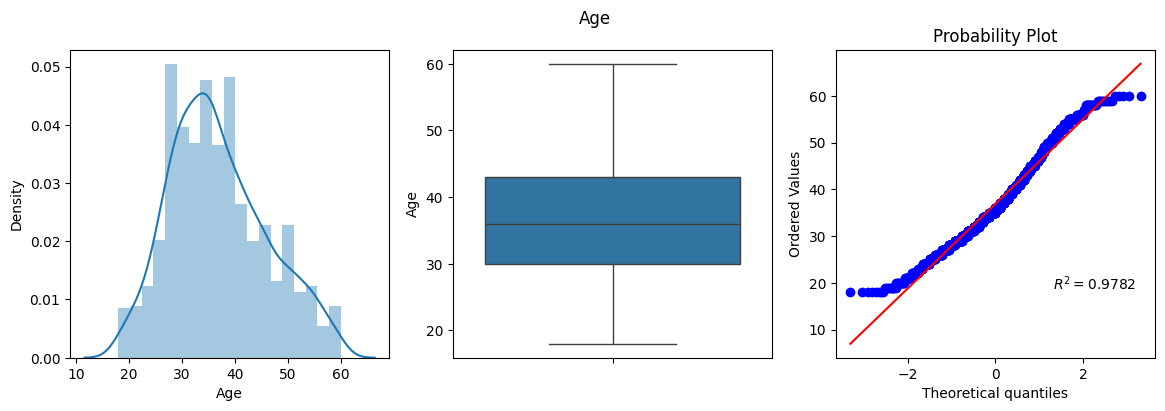

Skewness of DailyRate: -0.004615466706959892
Kurtosis of DailyRate: -1.2016912588244175


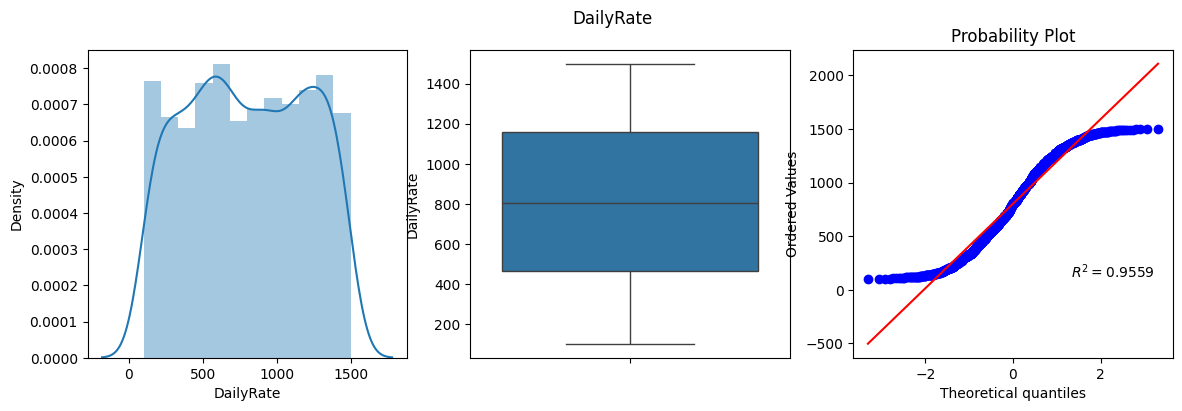

Skewness of DistanceFromHome: 0.9532255900346459
Kurtosis of DistanceFromHome: -0.23802937266779045


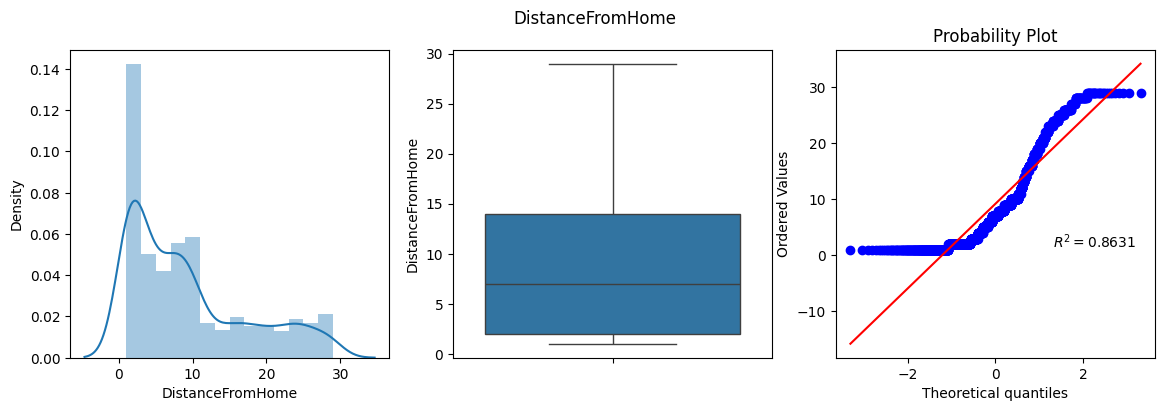

Skewness of Education: -0.2883531639528258
Kurtosis of Education: -0.5565959715891626


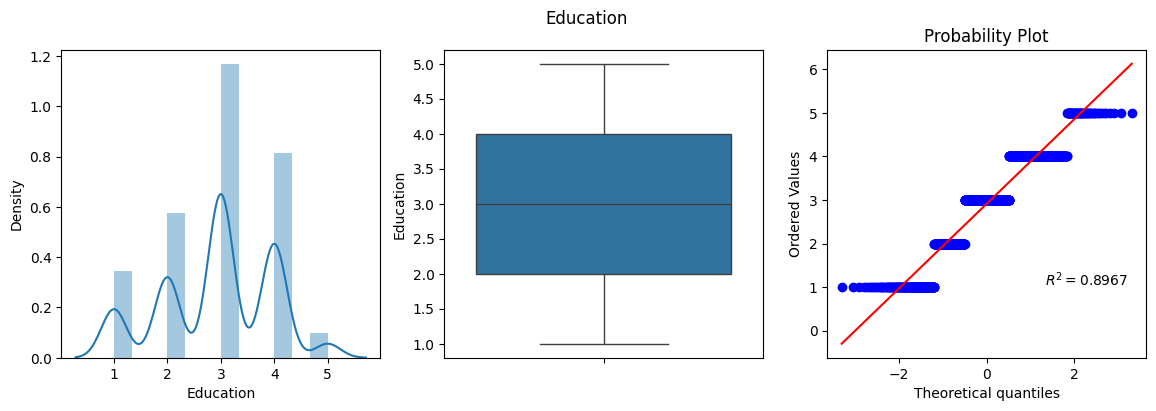

Skewness of EmployeeNumber: 0.013425741359180626
Kurtosis of EmployeeNumber: -1.22197782421747


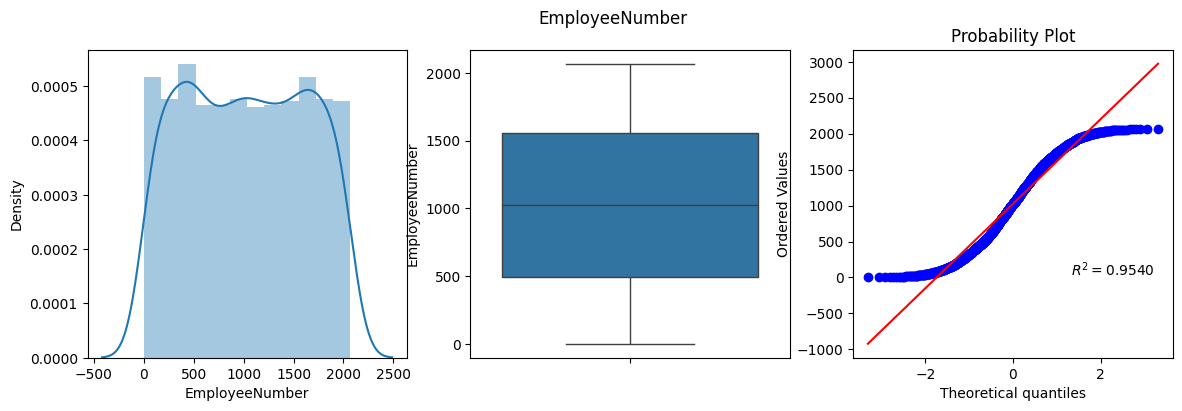

Skewness of EnvironmentSatisfaction: -0.3220224131290815
Kurtosis of EnvironmentSatisfaction: -1.2013484695802747


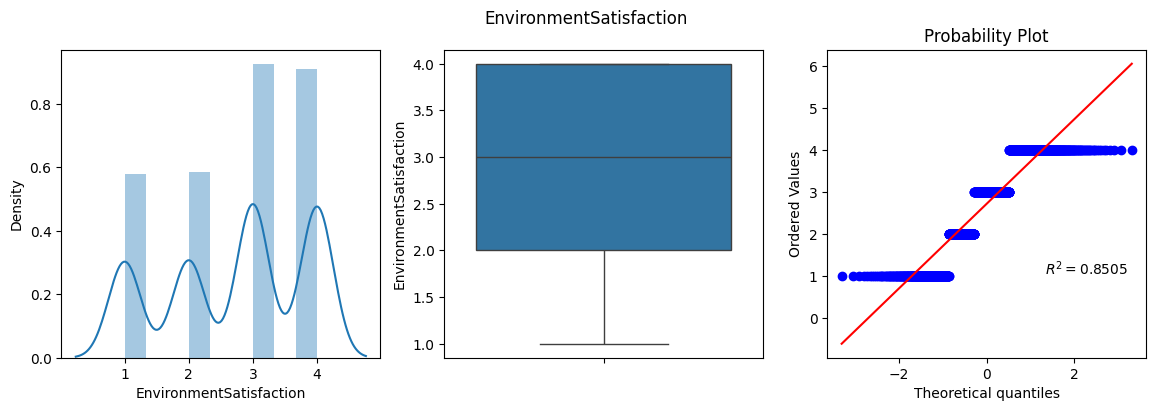

Skewness of HourlyRate: -0.03406065266830303
Kurtosis of HourlyRate: -1.1949832683372539


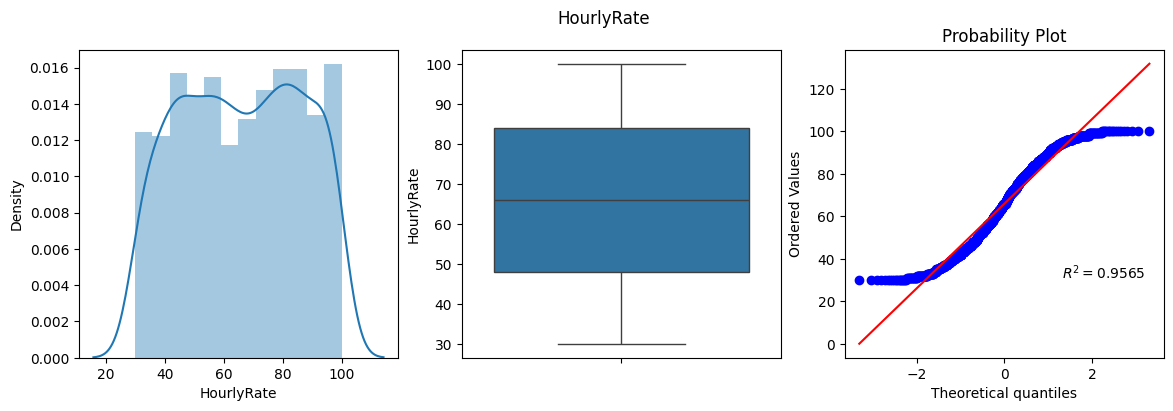

Skewness of JobInvolvement: -0.4959294293660246
Kurtosis of JobInvolvement: 0.2678638878523265


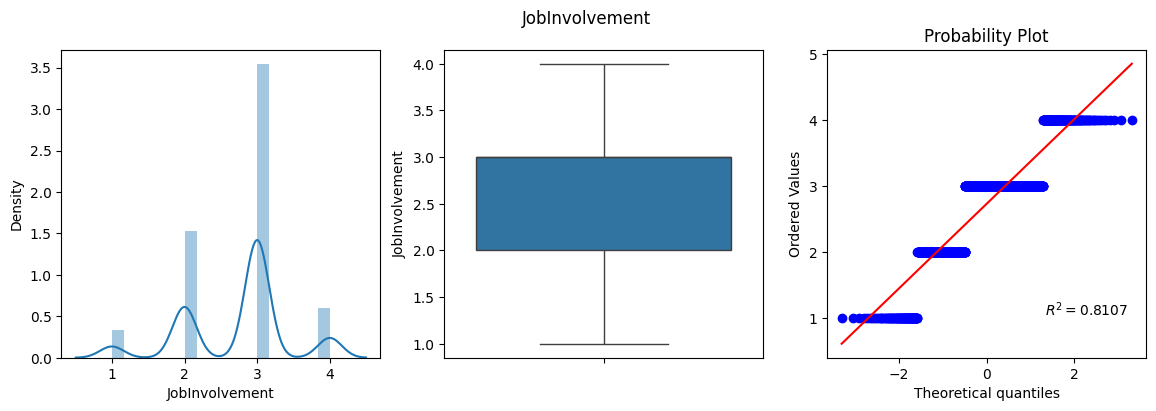

Skewness of JobLevel: 1.026587867298967
Kurtosis of JobLevel: 0.40010763619295453


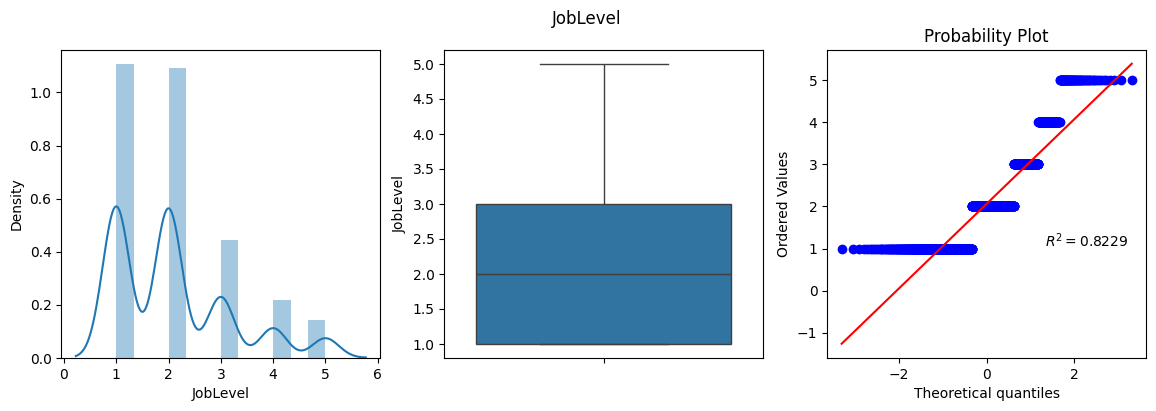

Skewness of JobSatisfaction: -0.33004226787826896
Kurtosis of JobSatisfaction: -1.220984970608128


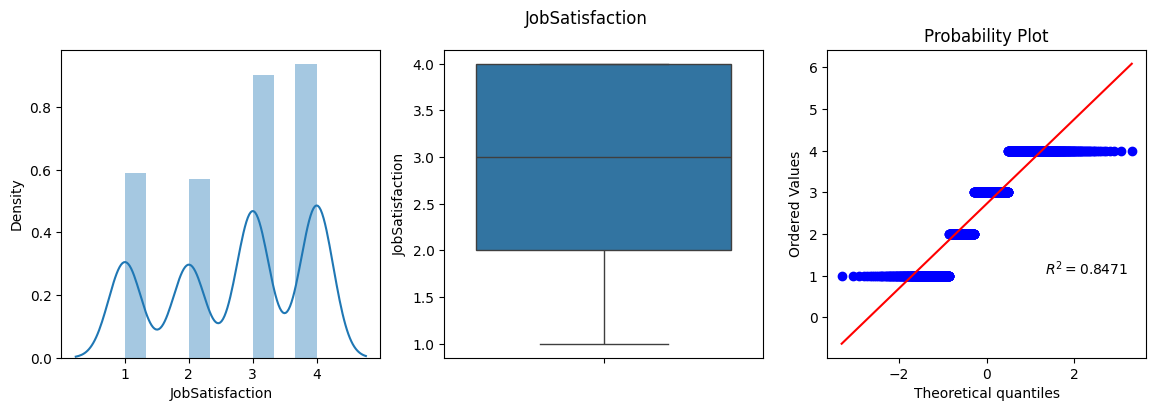

Skewness of MonthlyIncome: 1.3682491207491054
Kurtosis of MonthlyIncome: 0.9990069069862839


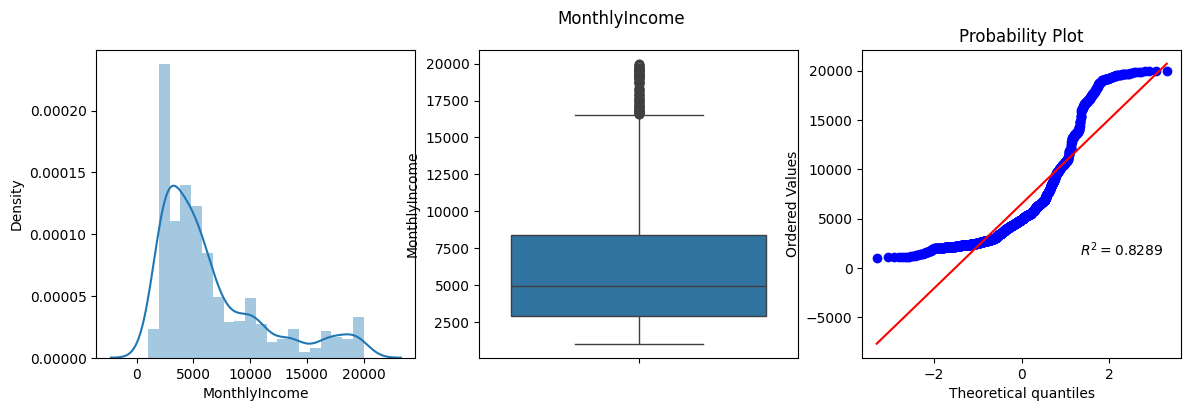

Skewness of MonthlyRate: 0.015795855068972024
Kurtosis of MonthlyRate: -1.2152041142583514


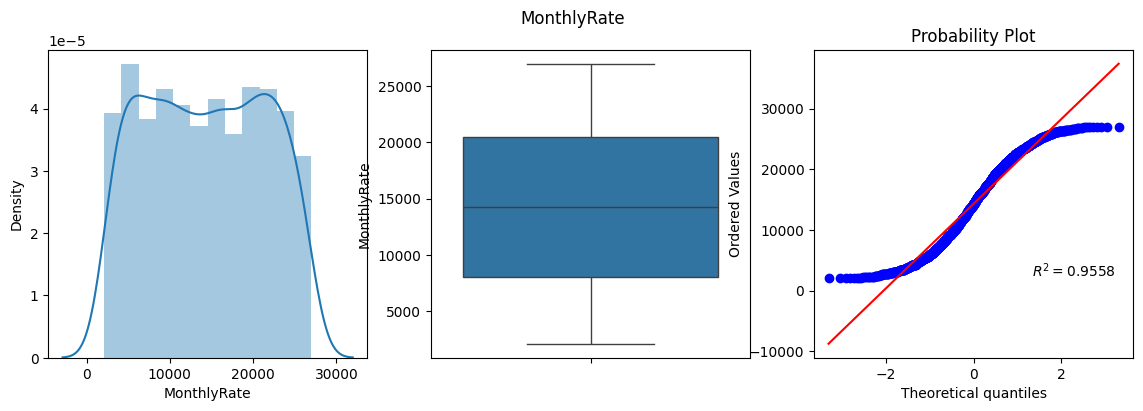

Skewness of NumCompaniesWorked: 1.0247863037300864
Kurtosis of NumCompaniesWorked: 0.006651465668261469


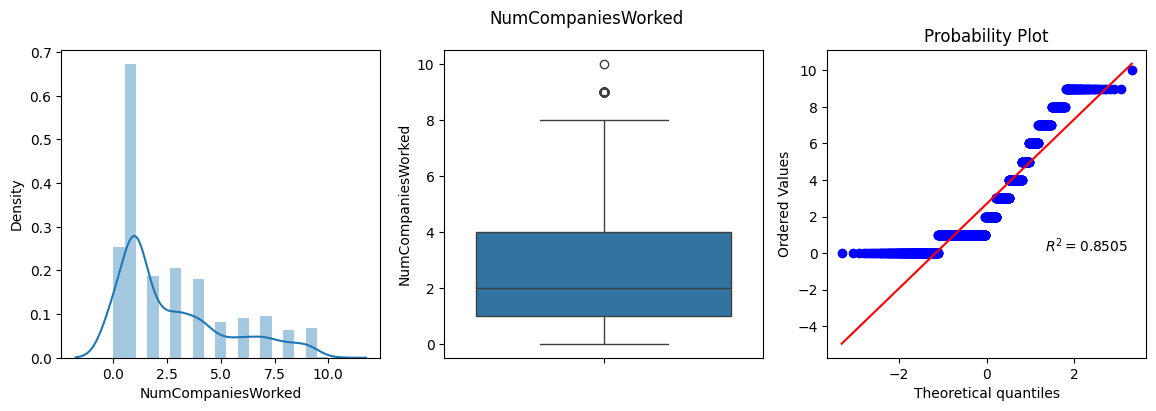

Skewness of PercentSalaryHike: 0.8189948965184718
Kurtosis of PercentSalaryHike: -0.3008266366152257


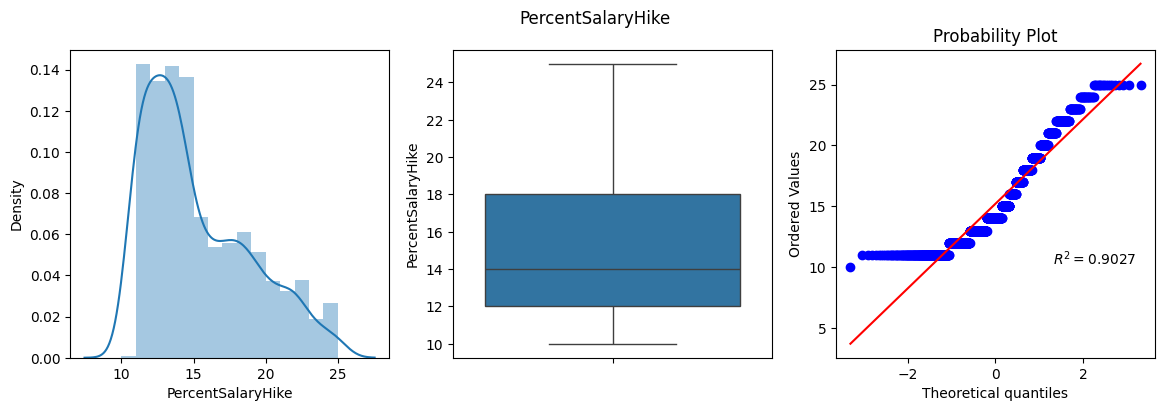

Skewness of PerformanceRating: 1.9107833987790872
Kurtosis of PerformanceRating: 1.653336210000381


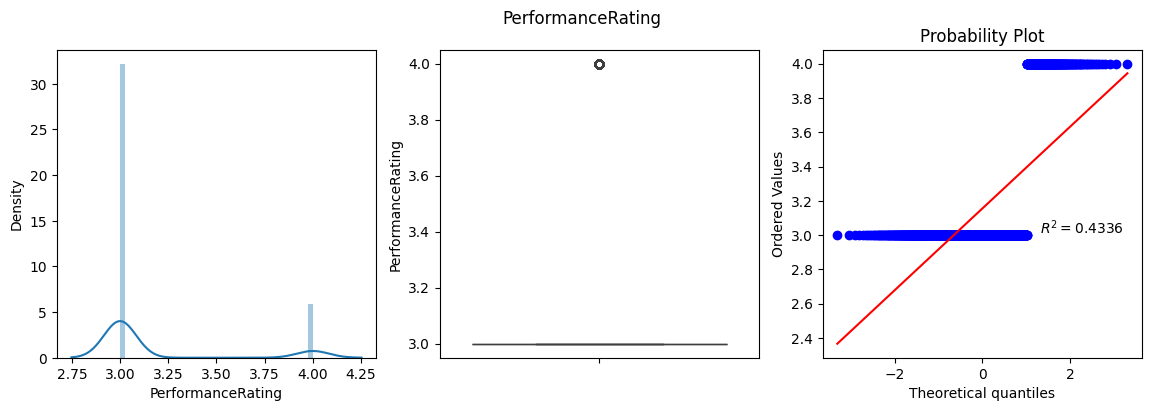

Skewness of RelationshipSatisfaction: -0.3028688106066656
Kurtosis of RelationshipSatisfaction: -1.1824951841893752


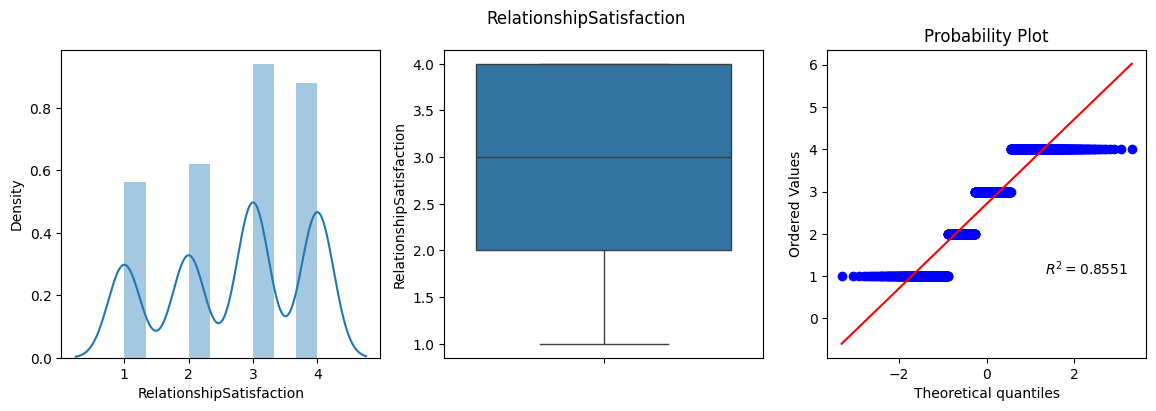

Skewness of StockOptionLevel: 0.9669807552520722
Kurtosis of StockOptionLevel: 0.3594123572482868


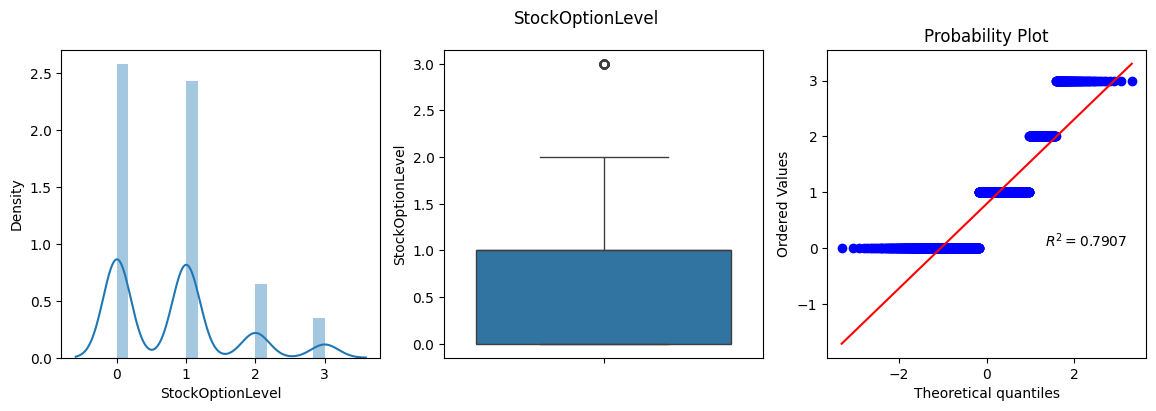

Skewness of TotalWorkingYears: 1.1173142502380733
Kurtosis of TotalWorkingYears: 0.9103873439055525


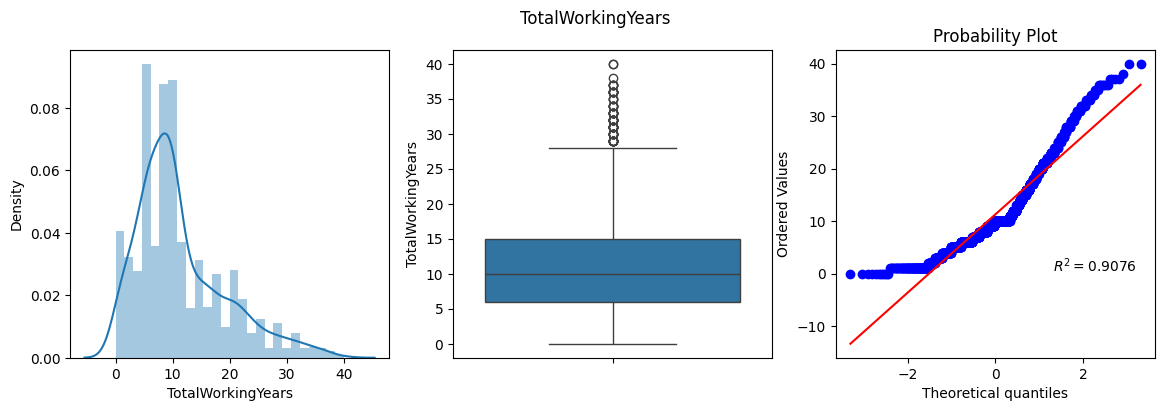

Skewness of TrainingTimesLastYear: 0.552633343282903
Kurtosis of TrainingTimesLastYear: 0.49172737991043824


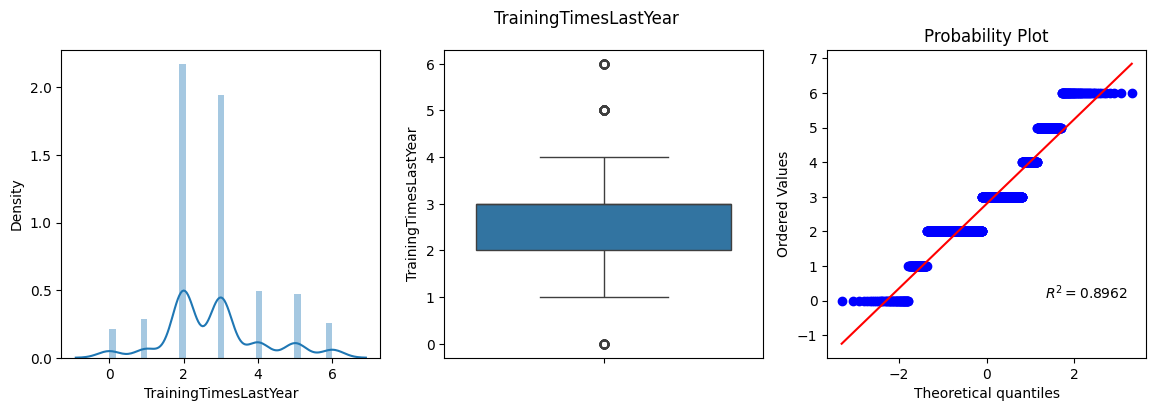

Skewness of WorkLifeBalance: -0.5548402723464889
Kurtosis of WorkLifeBalance: 0.42639970256800774


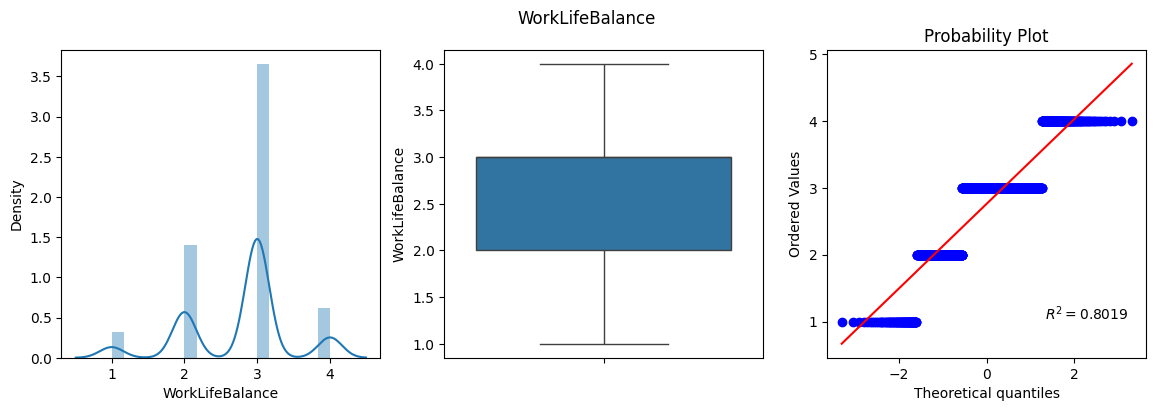

Skewness of YearsAtCompany: 1.7547762607331245
Kurtosis of YearsAtCompany: 3.8674675923701436


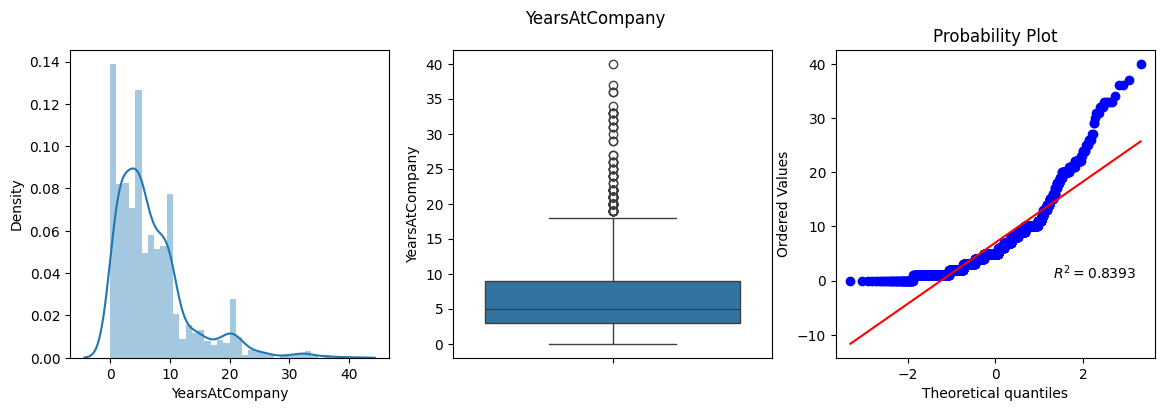

Skewness of YearsInCurrentRole: 0.9174438020709493
Kurtosis of YearsInCurrentRole: 0.4667696992684194


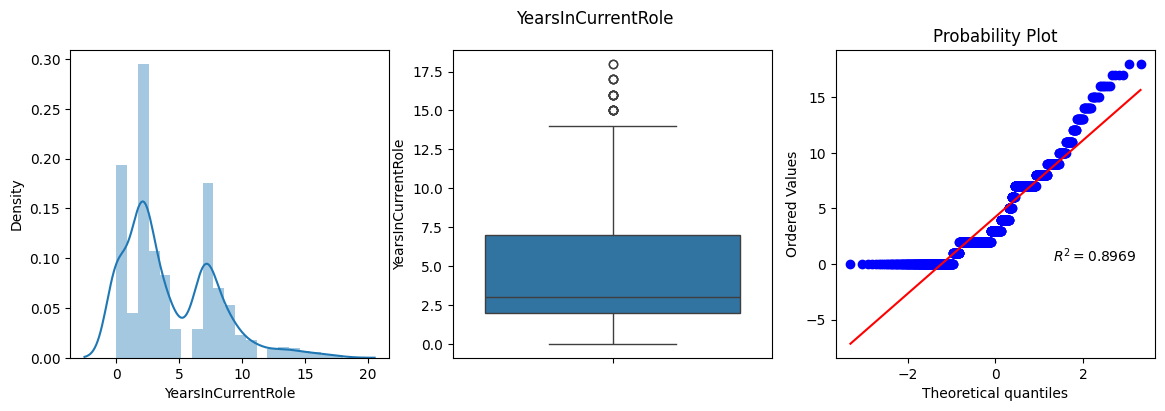

Skewness of YearsSinceLastPromotion: 1.9806841495092835
Kurtosis of YearsSinceLastPromotion: 3.604082455250544


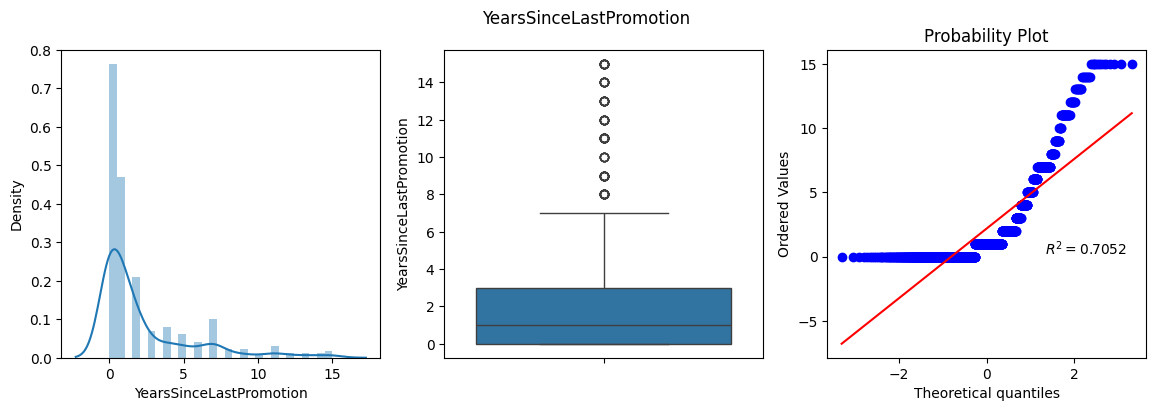

Skewness of YearsWithCurrManager: 0.8298542330325206
Kurtosis of YearsWithCurrManager: 0.1624384339750402


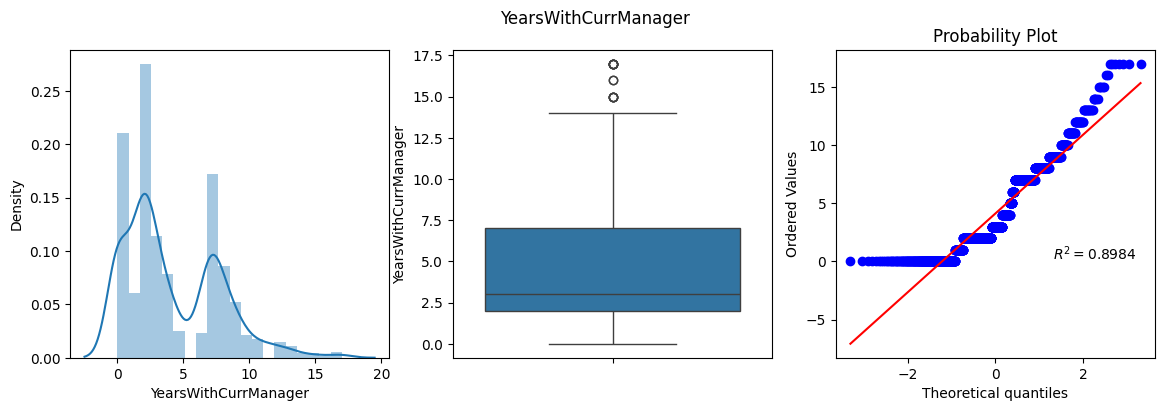

In [ ]:
for col in df.select_dtypes(np.number).columns:
    print(f"Skewness of {col}:",df[col].skew())
    print(f"Kurtosis of {col}:",df[col].kurtosis())
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    probplot(df[col],rvalue=True,plot=plt,dist='norm')
    plt.suptitle(col)
    plt.show()
    gc.collect()

In [ ]:
skewed_cols = ['YearsWithCurrManager','YearsSinceLastPromotion','YearsInCurrentRole','YearsAtCompany','TrainingTimesLastYear','TotalWorkingYears','StockOptionLevel','PerformanceRating','NumCompaniesWorked','MonthlyIncome']

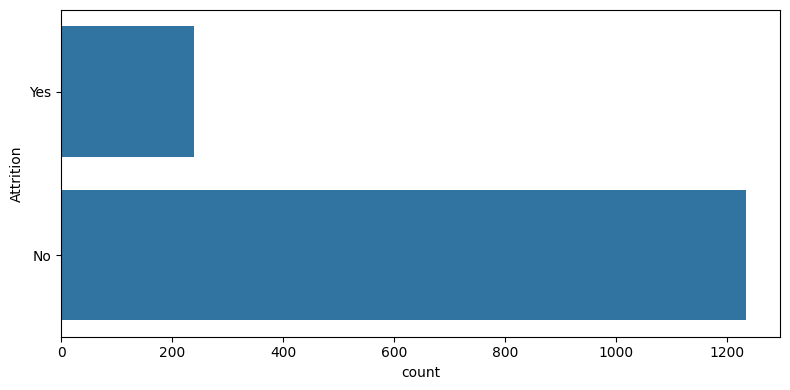

In [ ]:
plt.figure(figsize=(8,4))
fig = sns.countplot(df['Attrition'])
plt.tight_layout()
plt.show(fig)
plt.close('all')
del fig
gc.collect();

There is a clear imbalance in the target "Attrition" class with "No" being the majority label and "Yes" being the minority label.

Column 'Travel_Frequently' not found in the DataFrame.


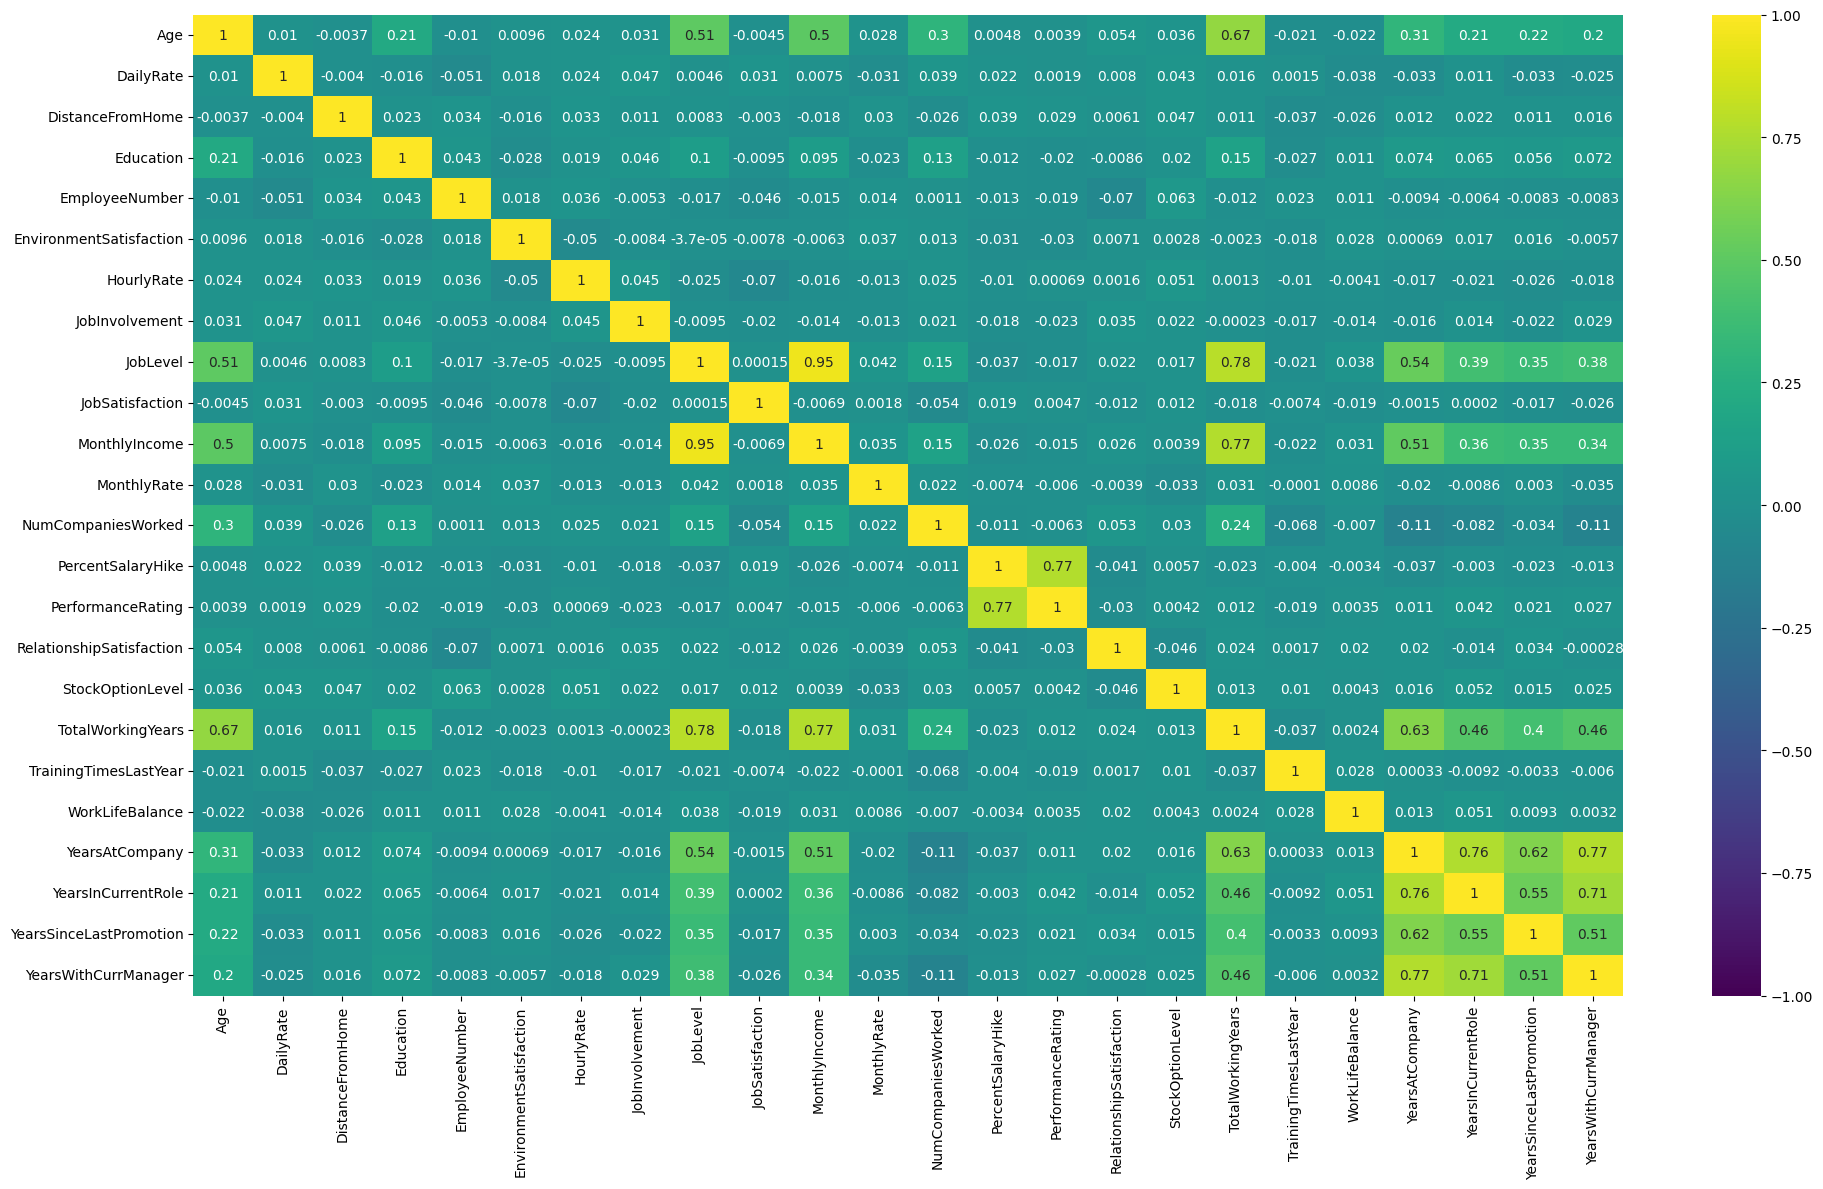

In [ ]:
# Convert 'Travel_Frequently' column to numerical representation
# Check if the column exists before applying the mapping
if 'Travel_Frequently' in df.columns:
    # Use .loc for safer assignment and avoid potential warnings
    df.loc[:, 'Travel_Frequently'] = df['Travel_Frequently'].map({'Yes': 1, 'No': 0, 'Non-Travel': 2})
else:
    print("Column 'Travel_Frequently' not found in the DataFrame.")

plt.figure(figsize=(20,12))
# Check if all columns are numeric before calculating correlation
numeric_df = df.select_dtypes(include=np.number)
fig = sns.heatmap(numeric_df.corr(),annot=True,cmap='viridis',vmin=-1.0,vmax=1.0)
plt.tight_layout()
plt.show(fig)
plt.close('all')
del fig
gc.collect();

## Feature Engineering

### Feature Transformation

In [ ]:
def apply_transform(transformer,col):
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    probplot(df[col],rvalue=True,dist='norm',plot=plt)
    plt.suptitle(f"{col} Before Transform")
    plt.show()
    col_tf = transformer.fit_transform(df[[col]])
    col_tf = np.array(col_tf).reshape(col_tf.shape[0])
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(col_tf)
    plt.subplot(132)
    sns.boxplot(col_tf)
    plt.subplot(133)
    probplot(col_tf,rvalue=True,dist='norm',plot=plt)
    plt.suptitle(f"{col} After Transform")
    plt.show()
    gc.collect();

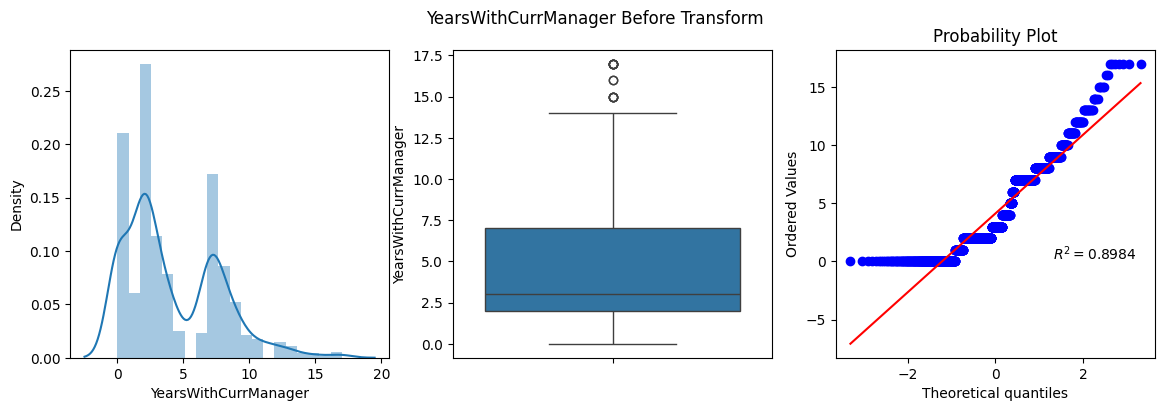

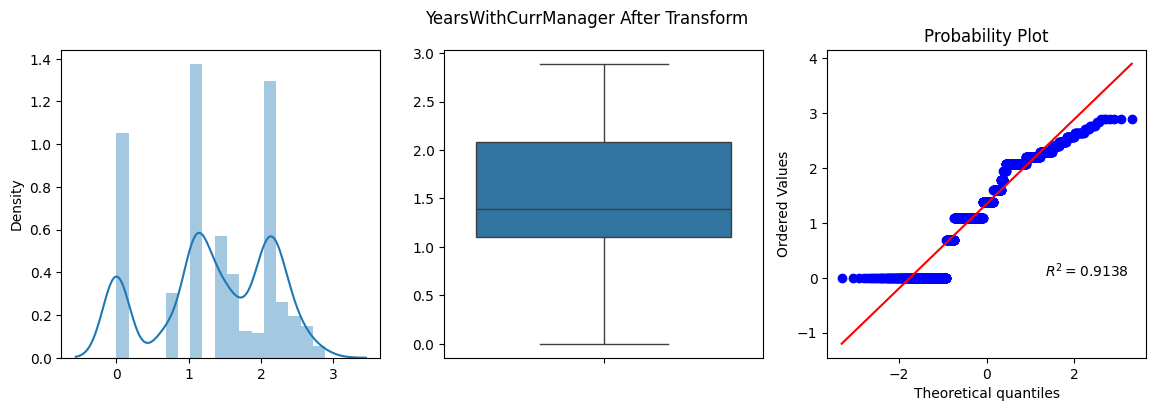

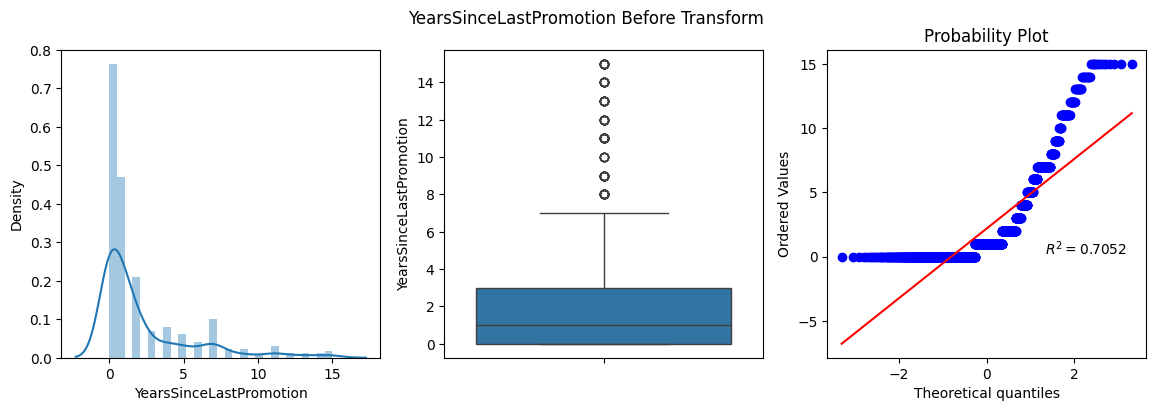

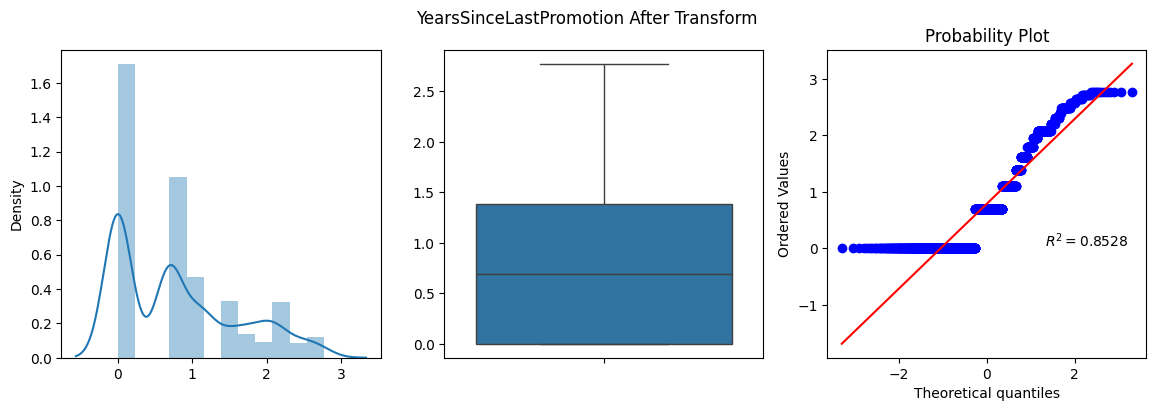

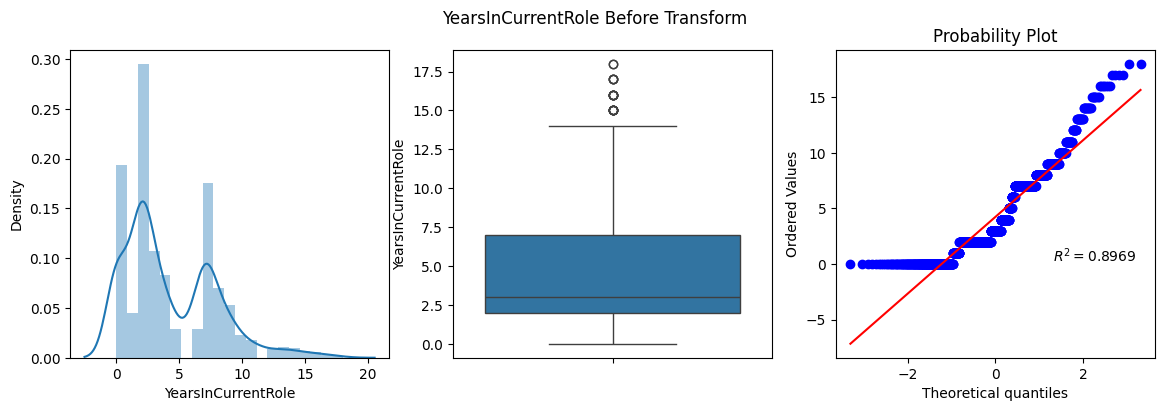

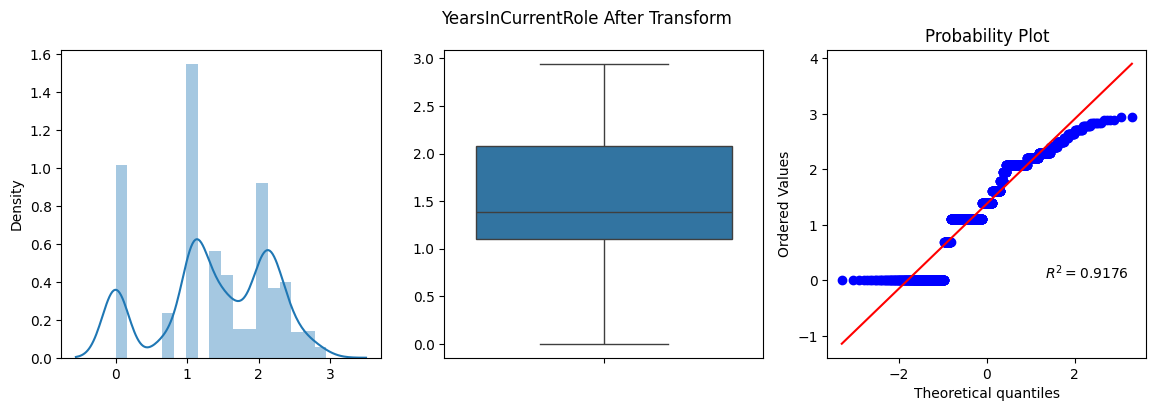

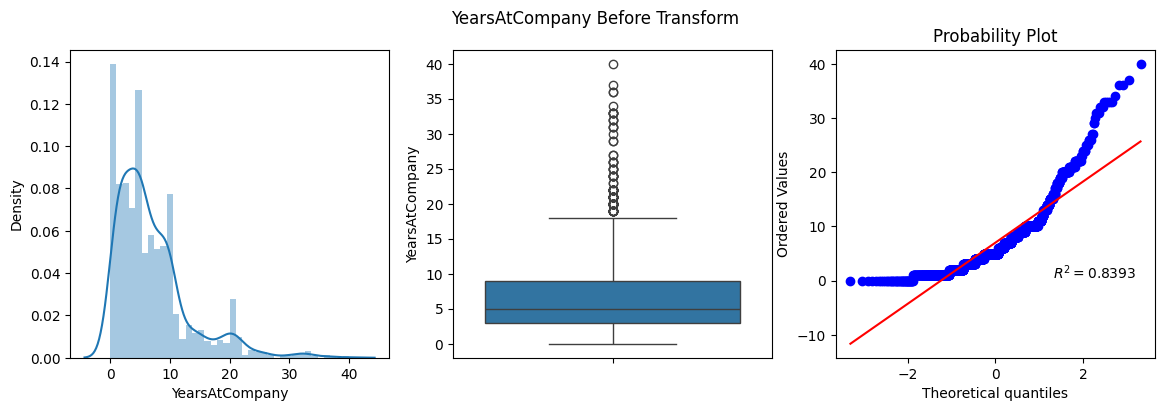

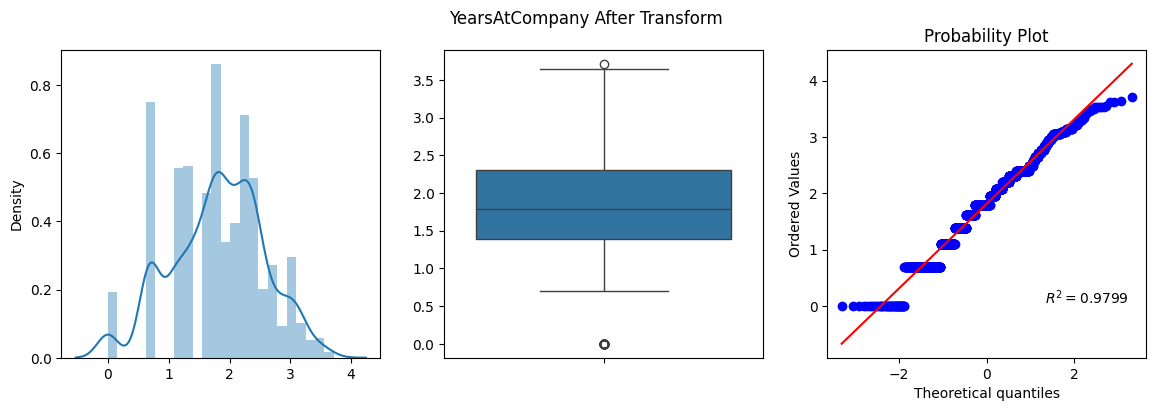

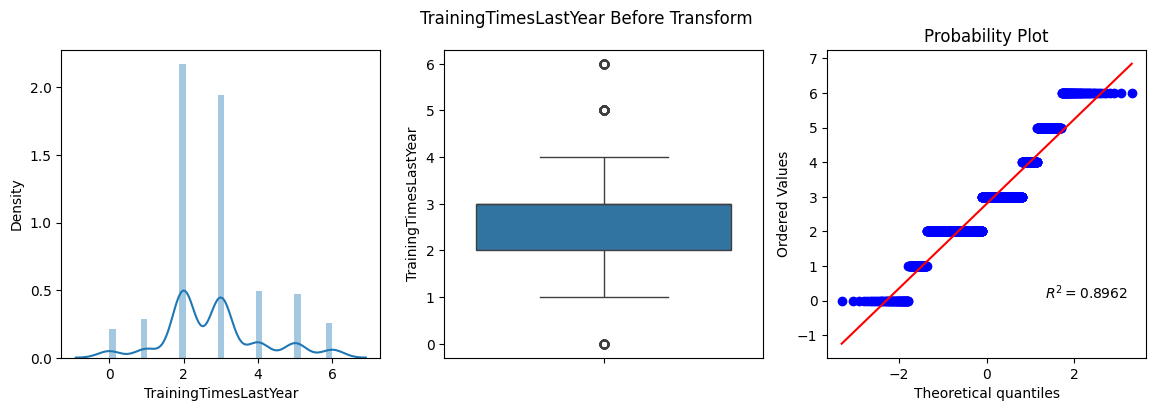

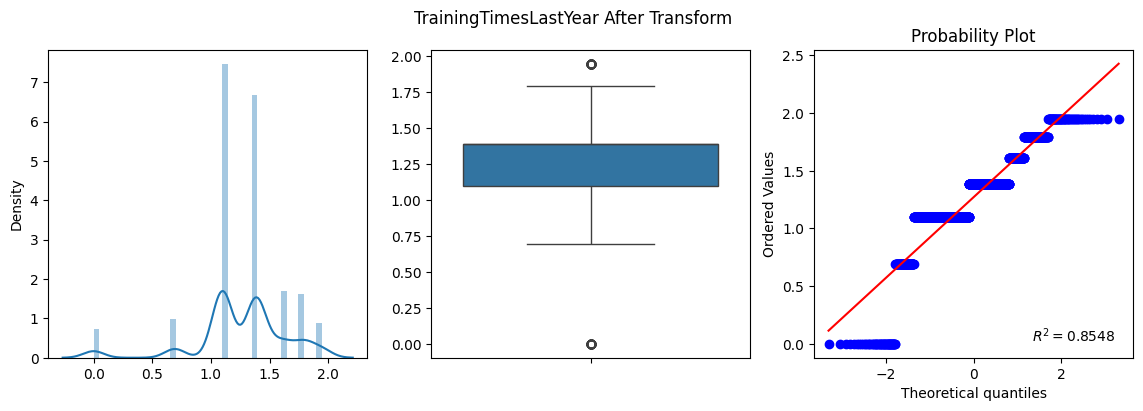

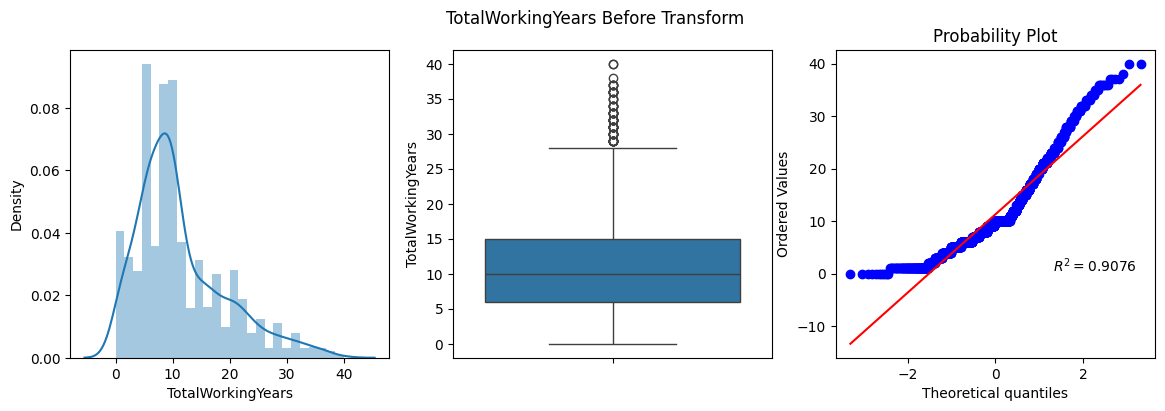

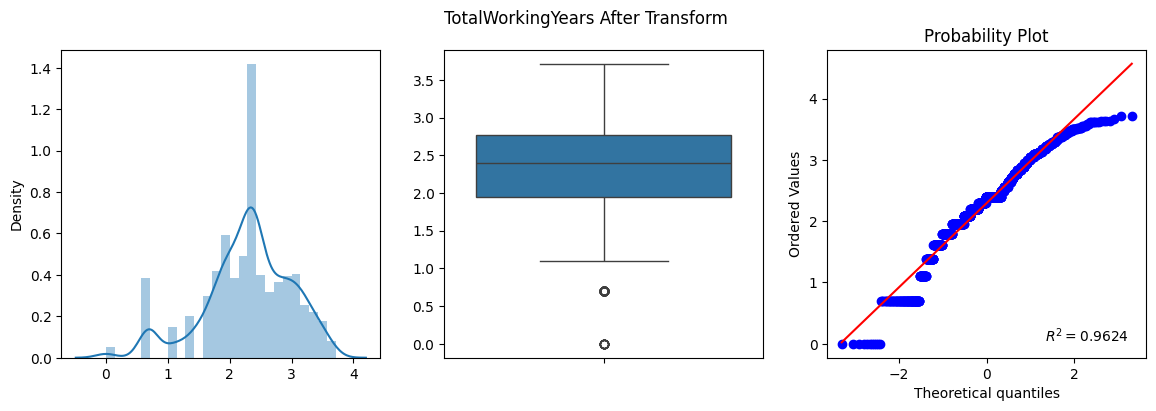

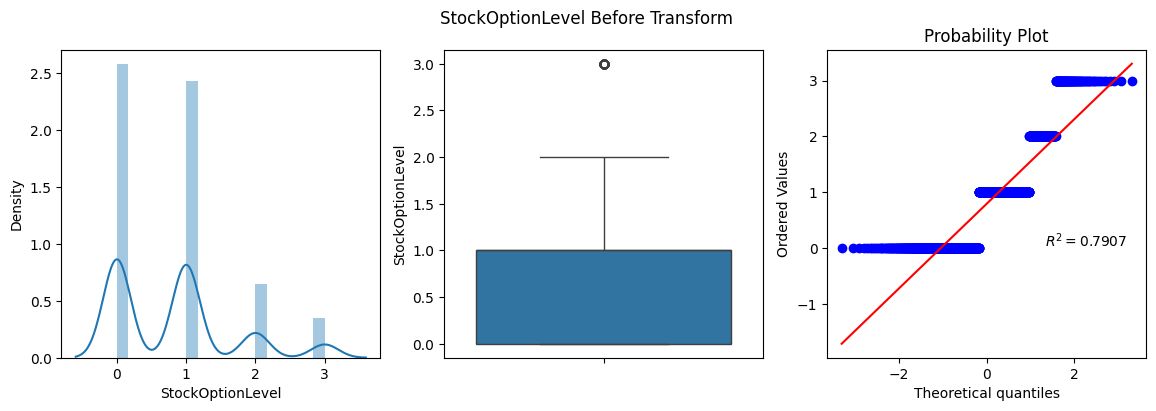

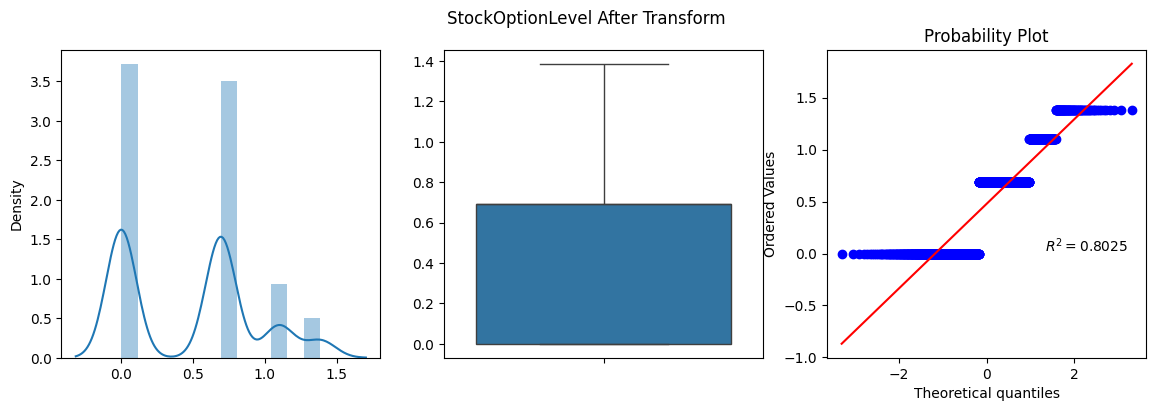

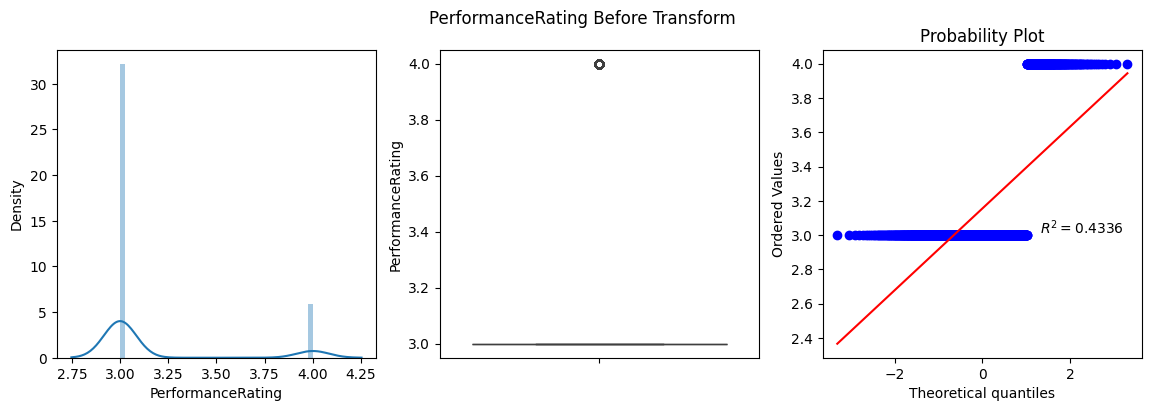

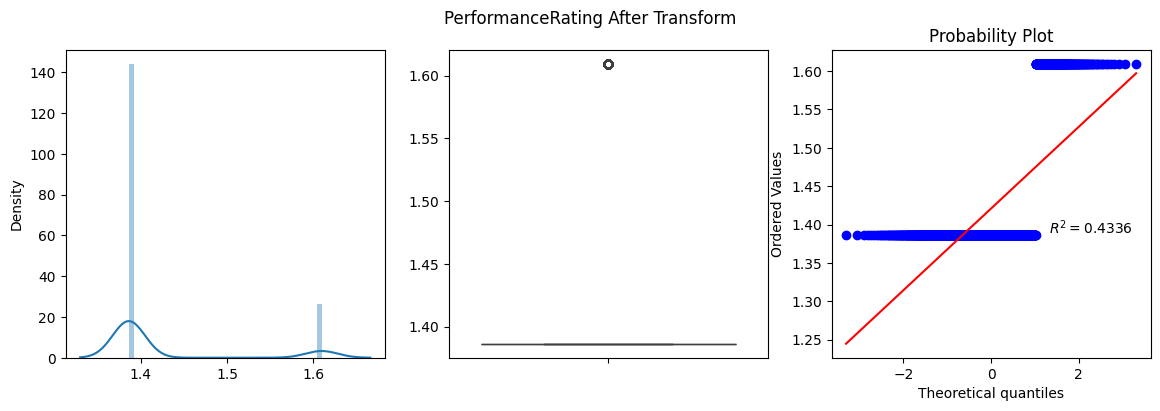

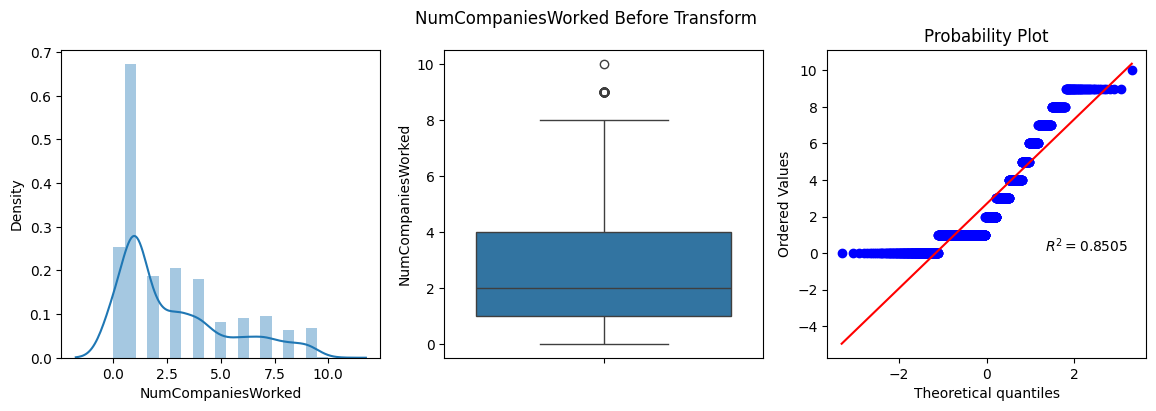

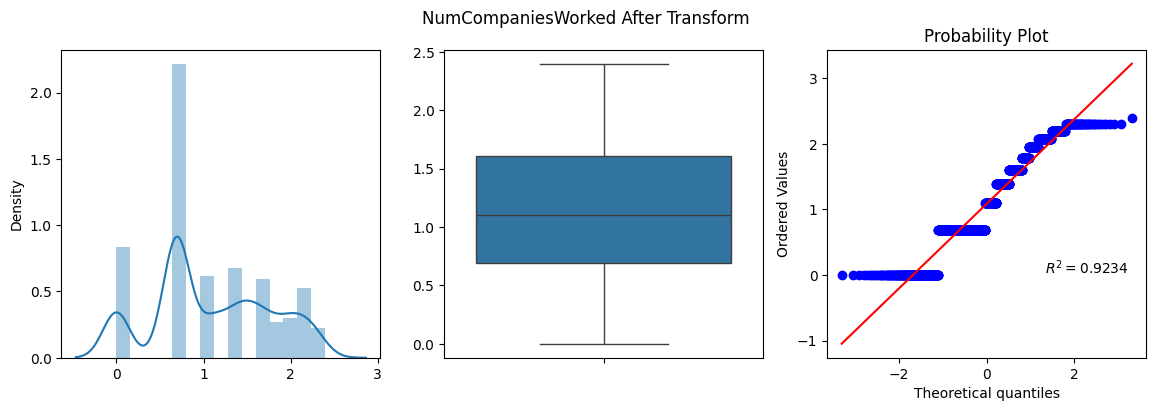

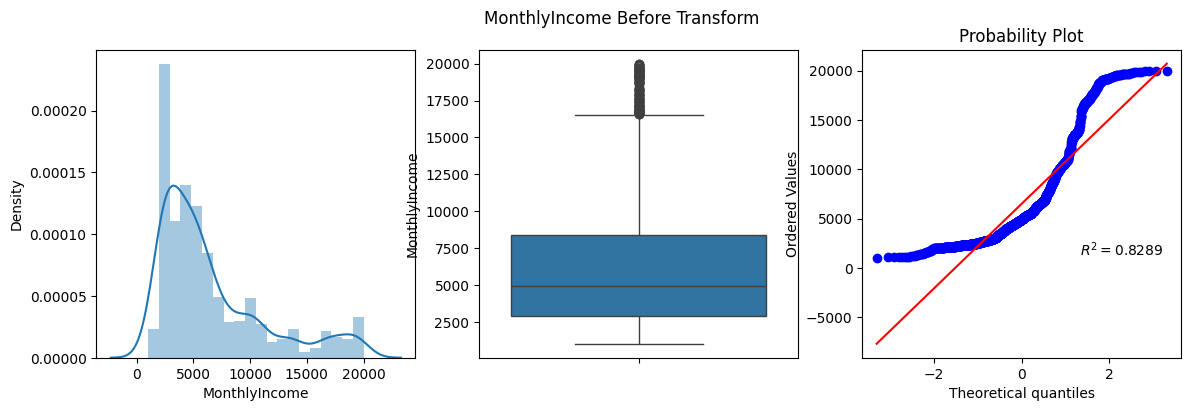

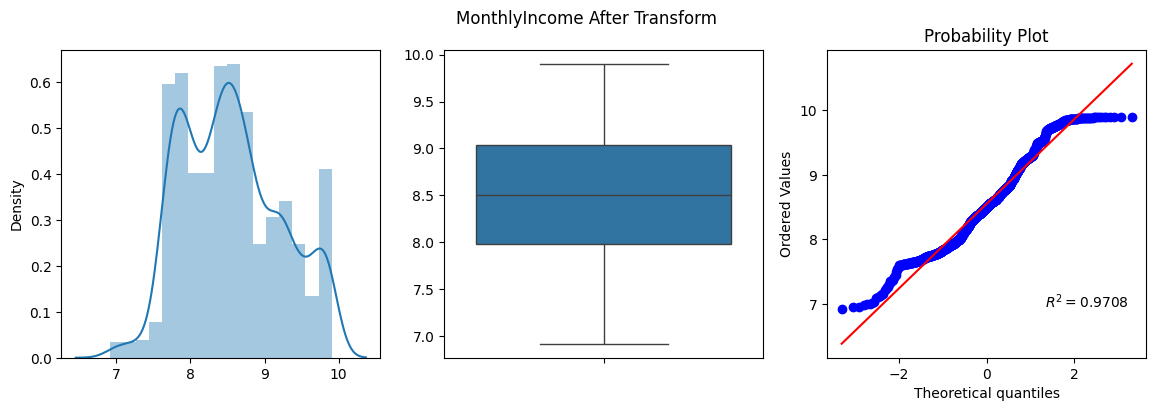

In [ ]:
# Log Transform
for col in skewed_cols:
    apply_transform(FunctionTransformer(np.log1p),col)

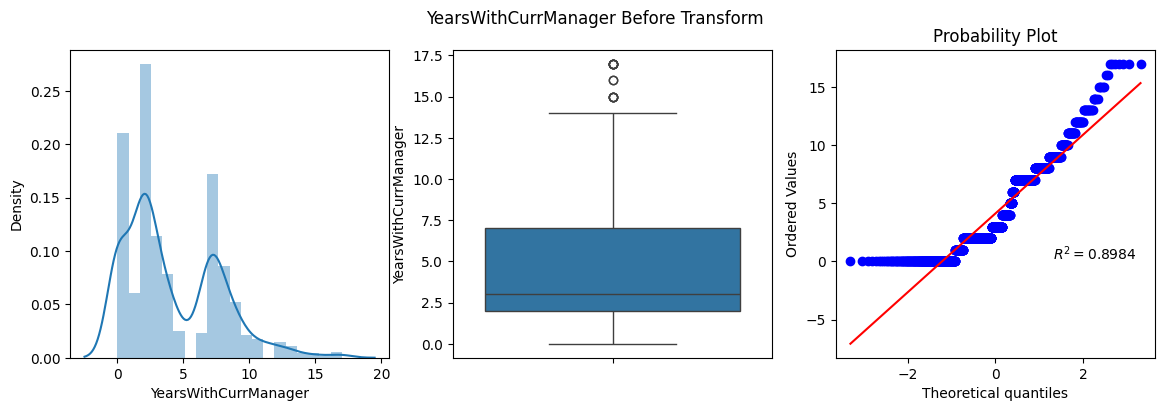

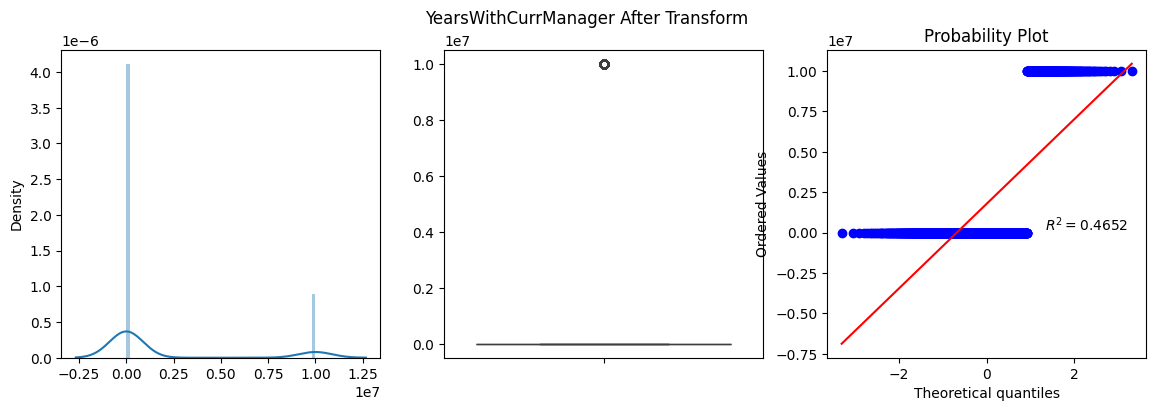

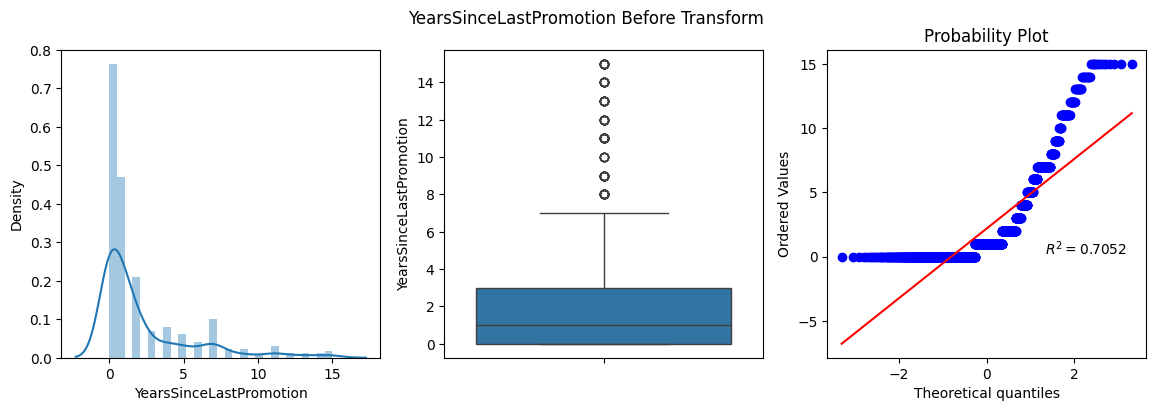

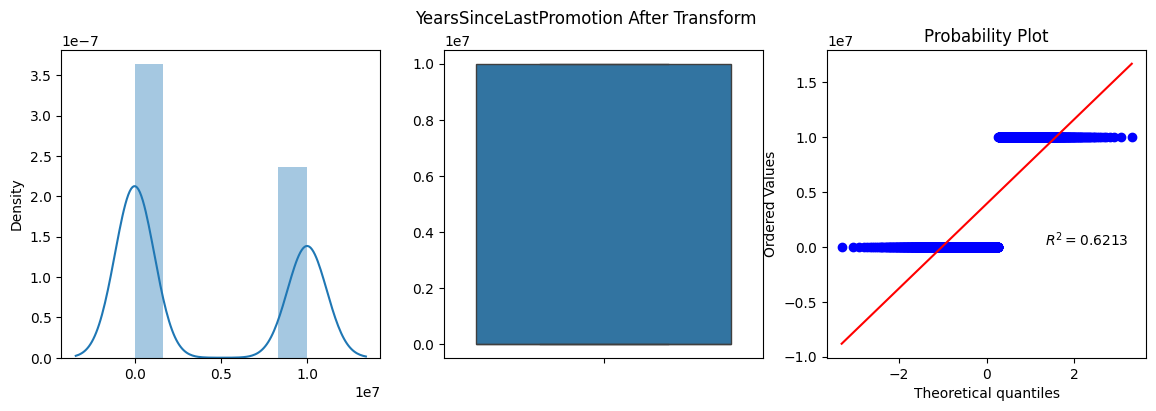

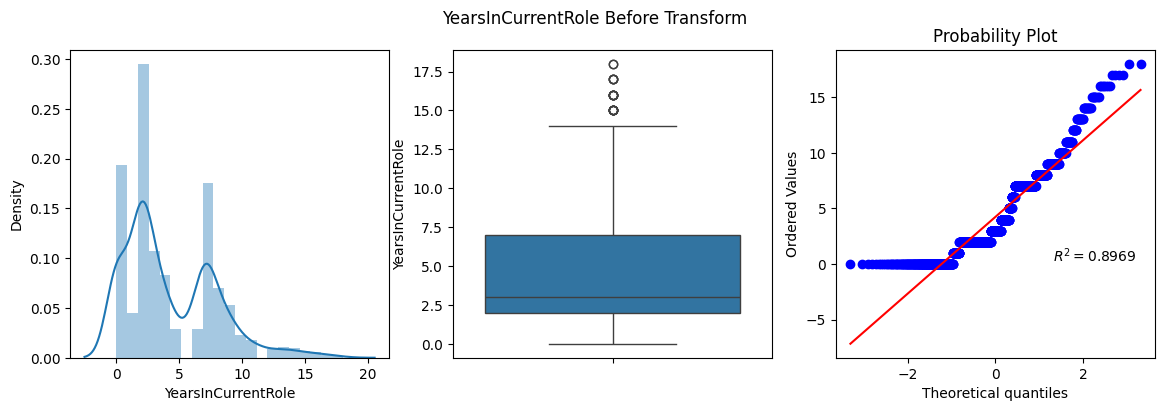

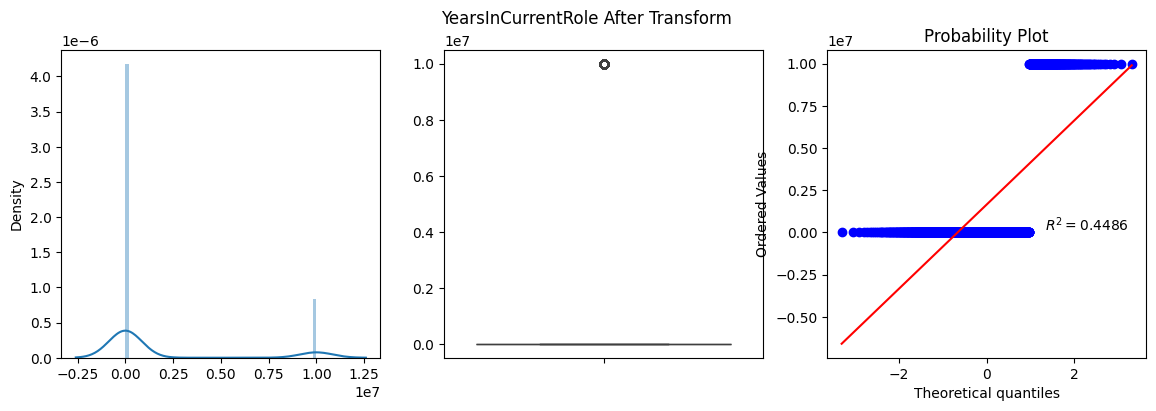

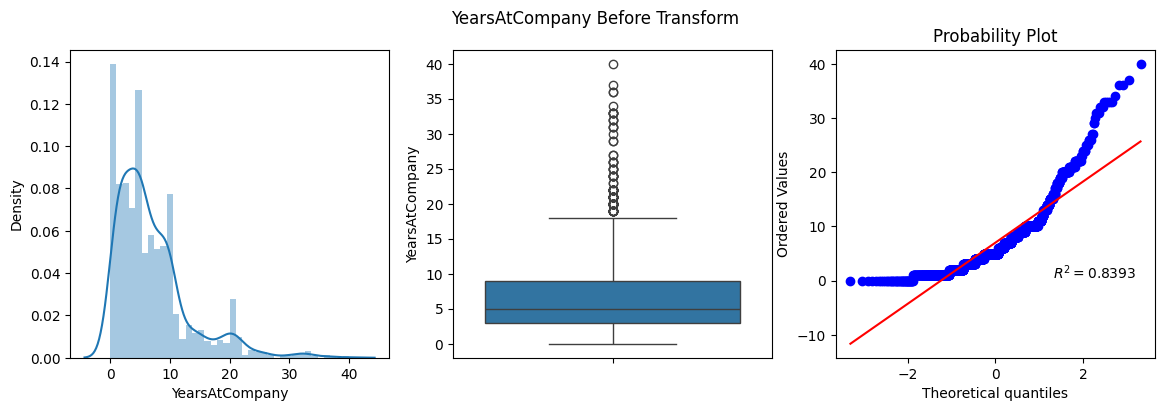

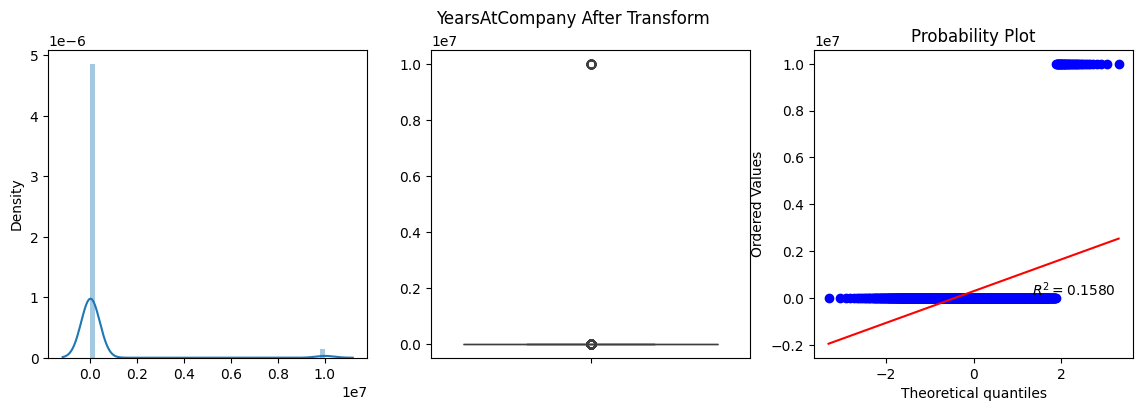

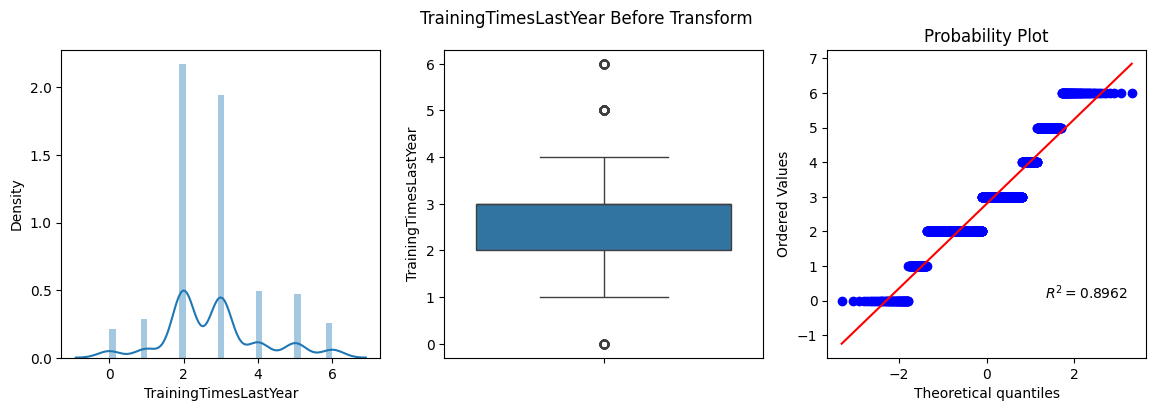

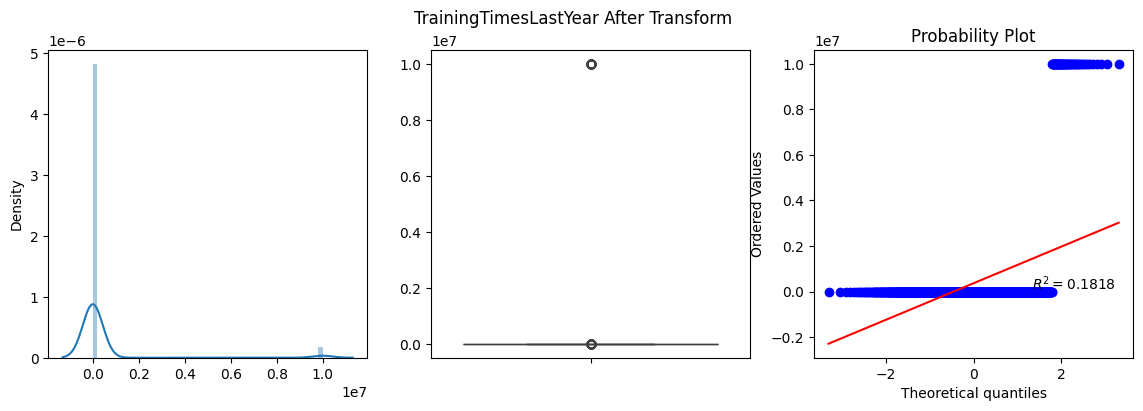

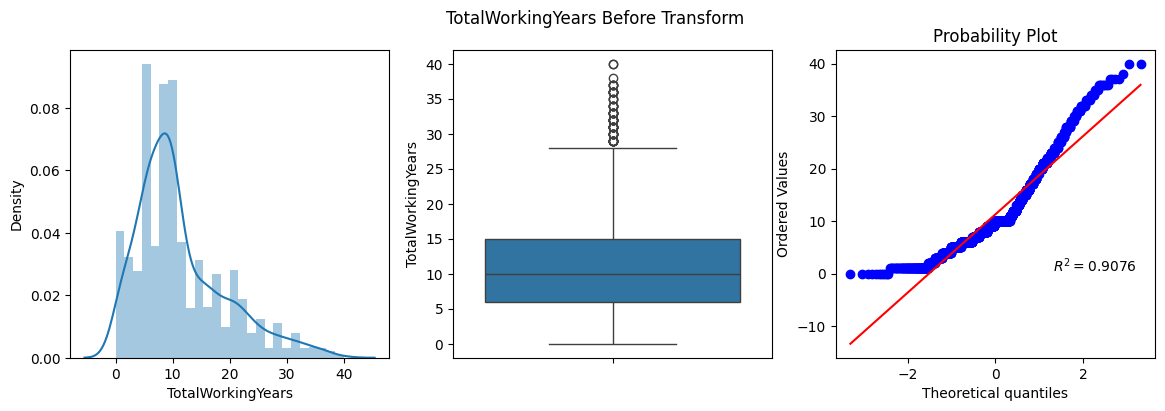

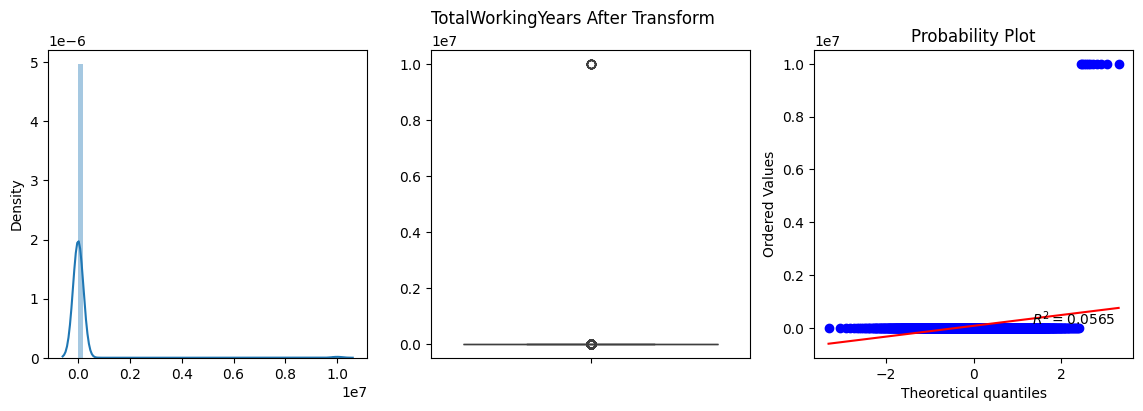

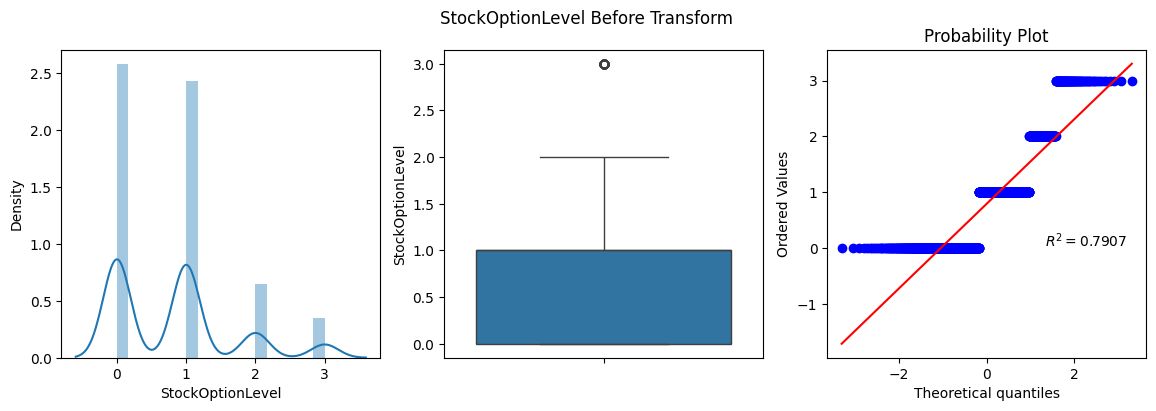

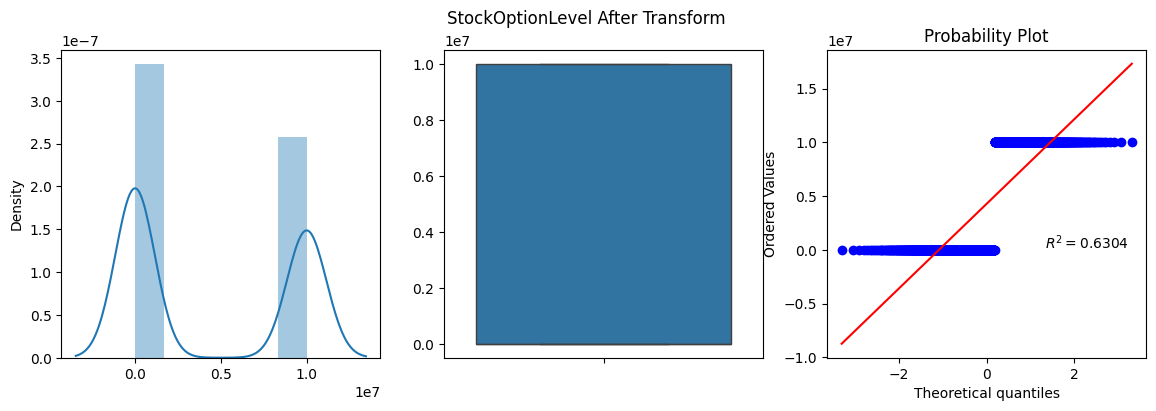

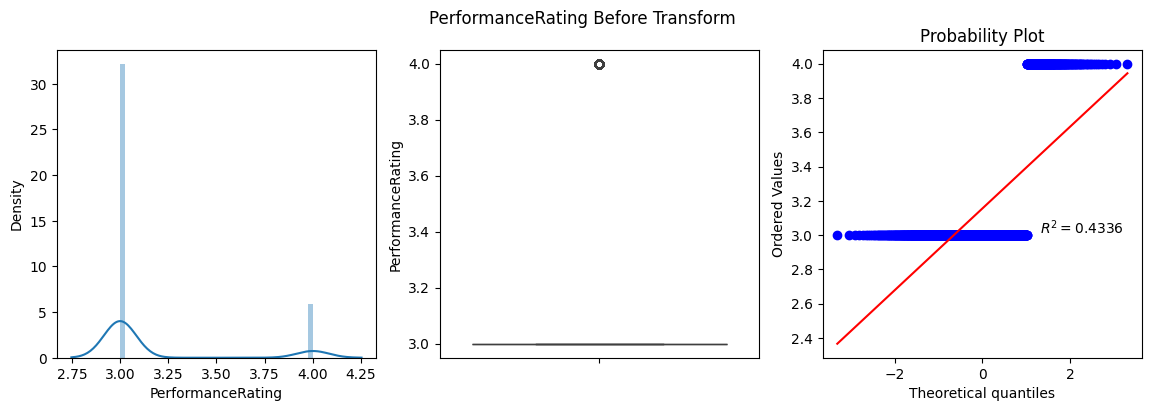

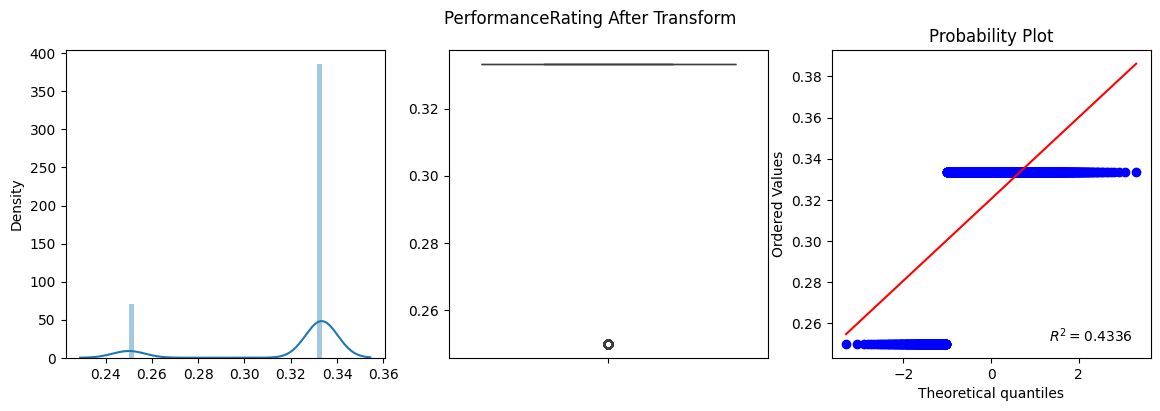

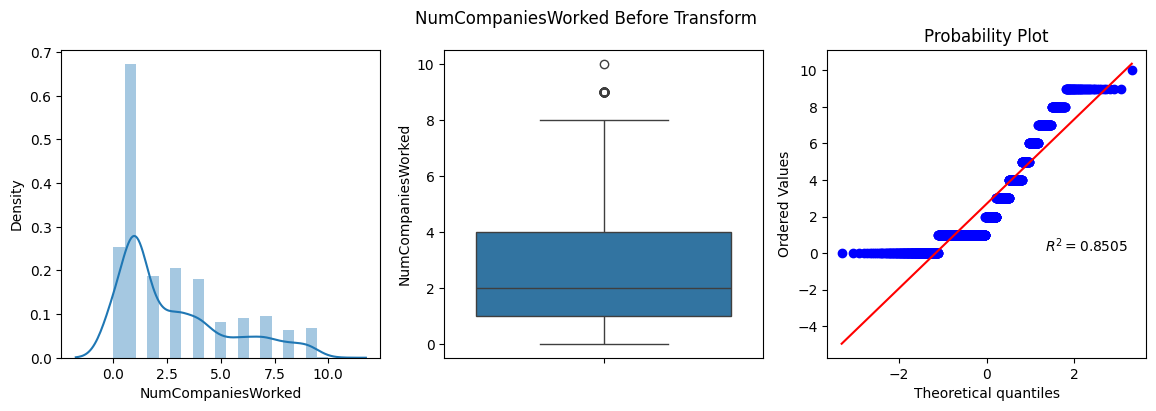

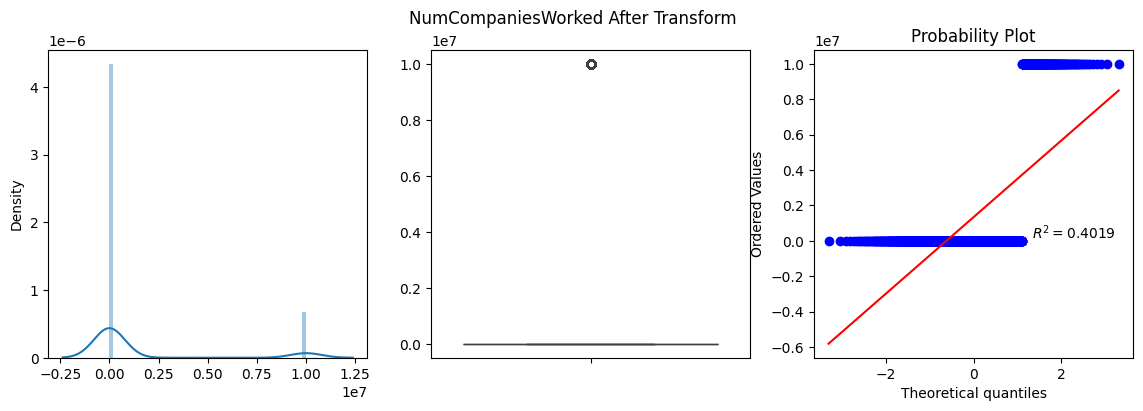

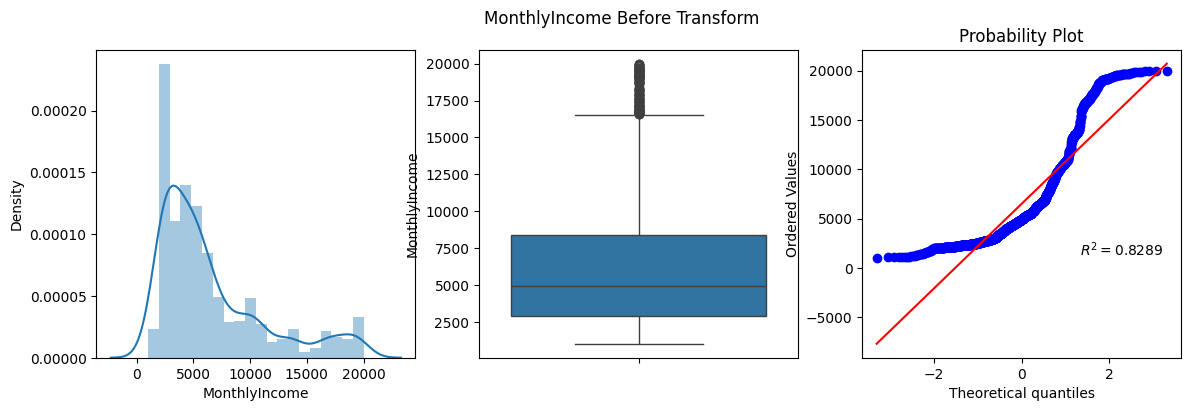

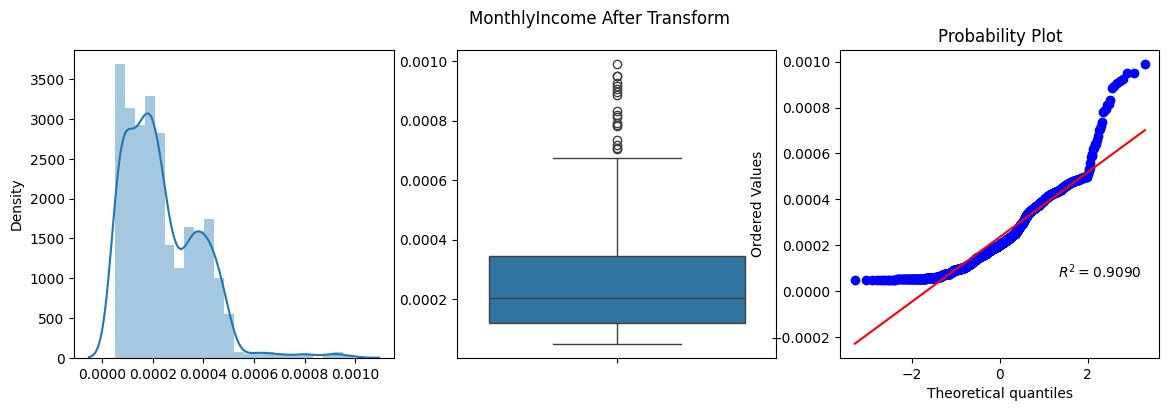

In [ ]:
# Reciprocal Transform
for col in skewed_cols:
    apply_transform(FunctionTransformer(lambda x: 1/(x+0.0000001)),col)

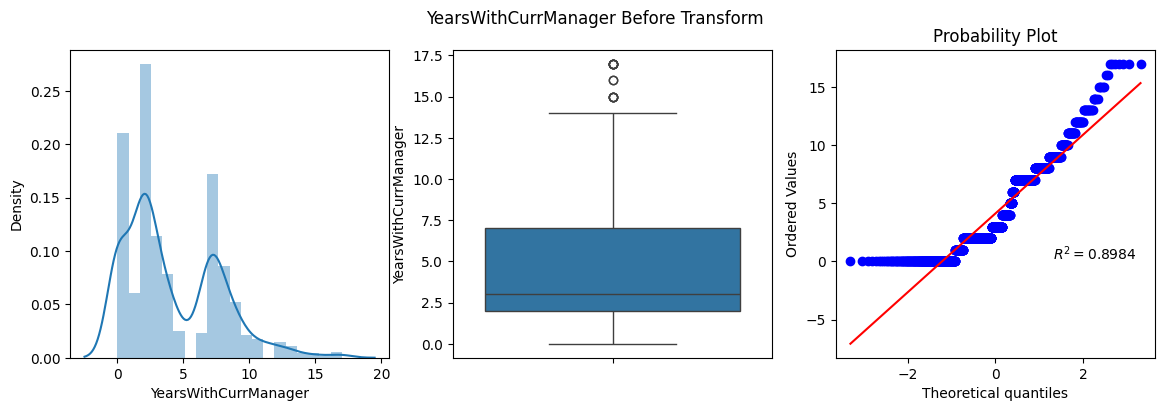

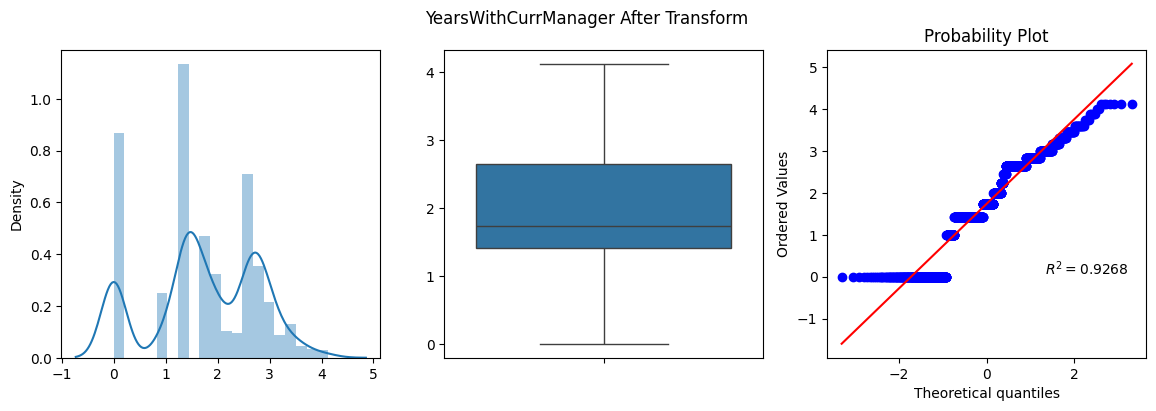

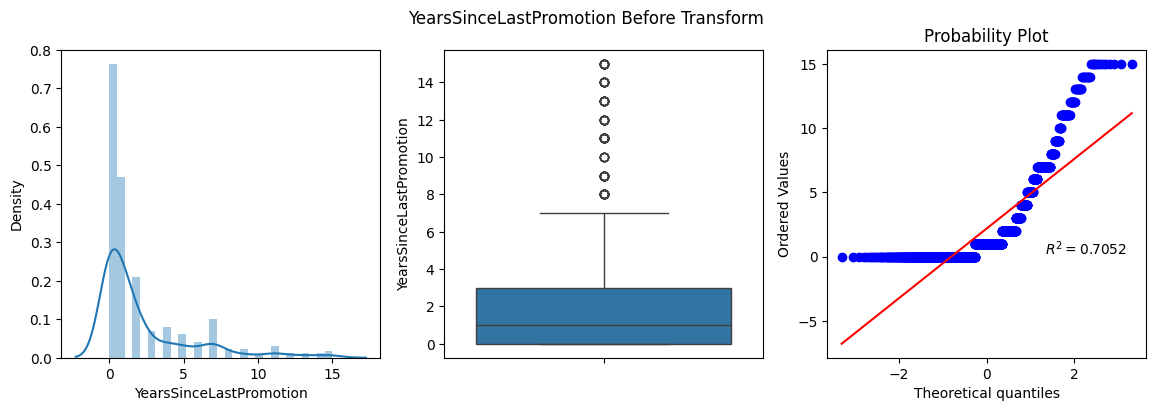

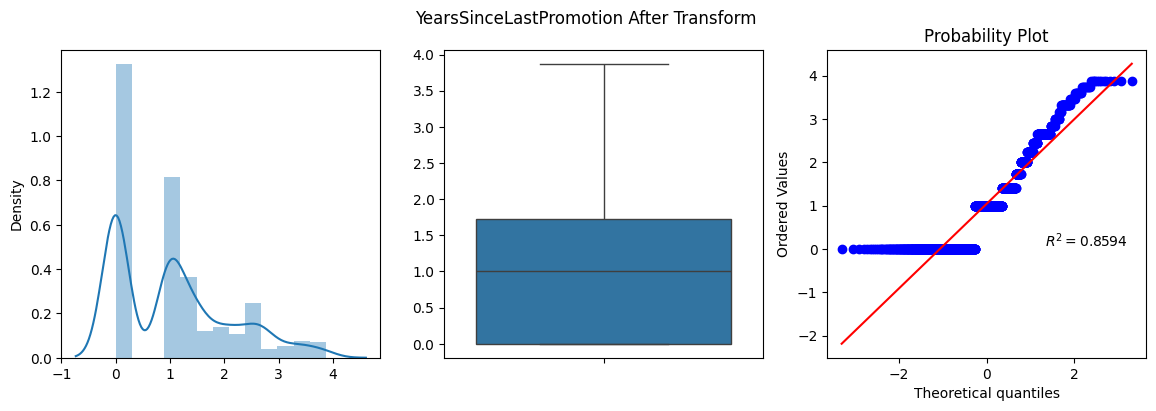

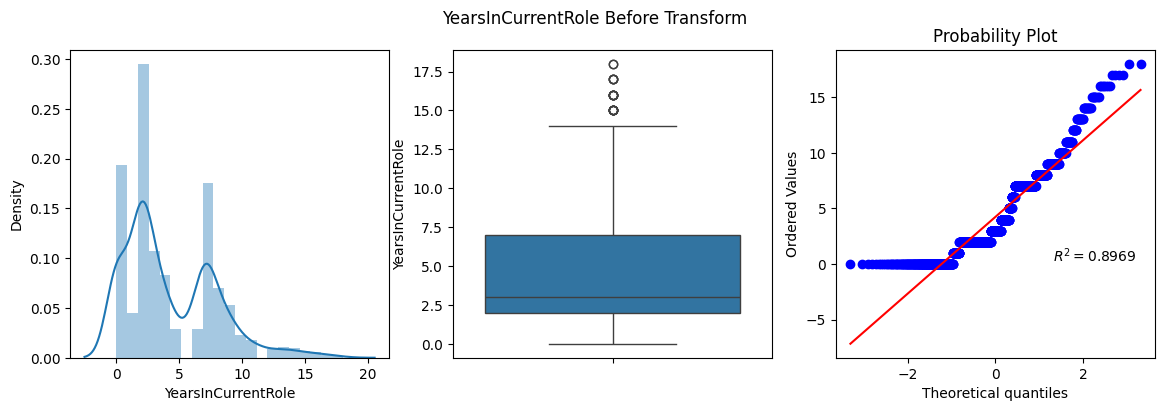

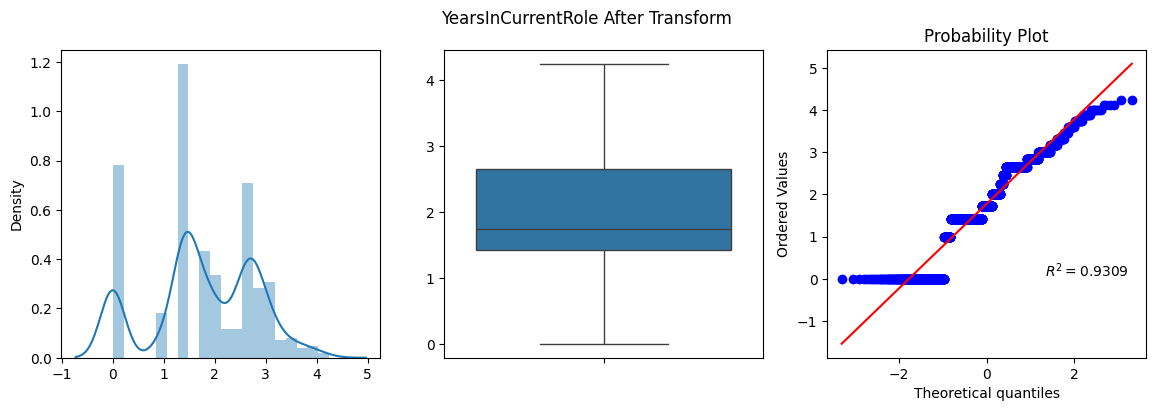

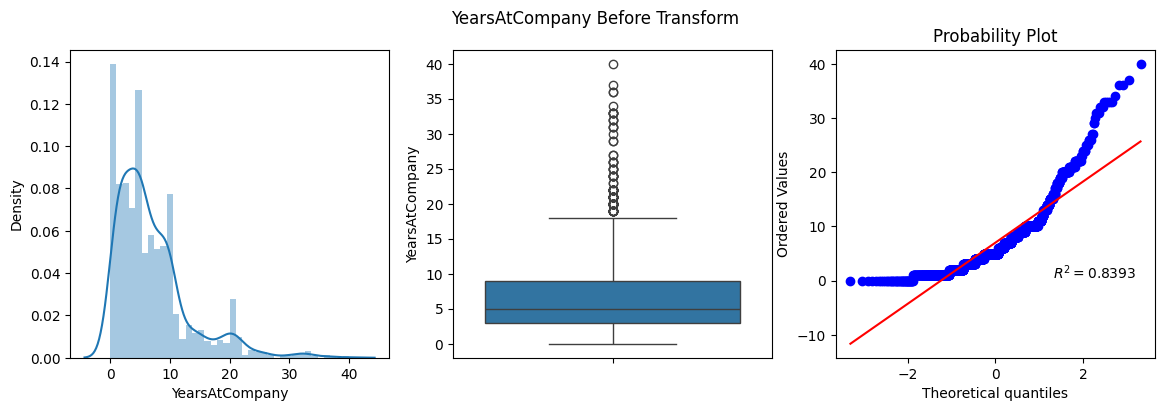

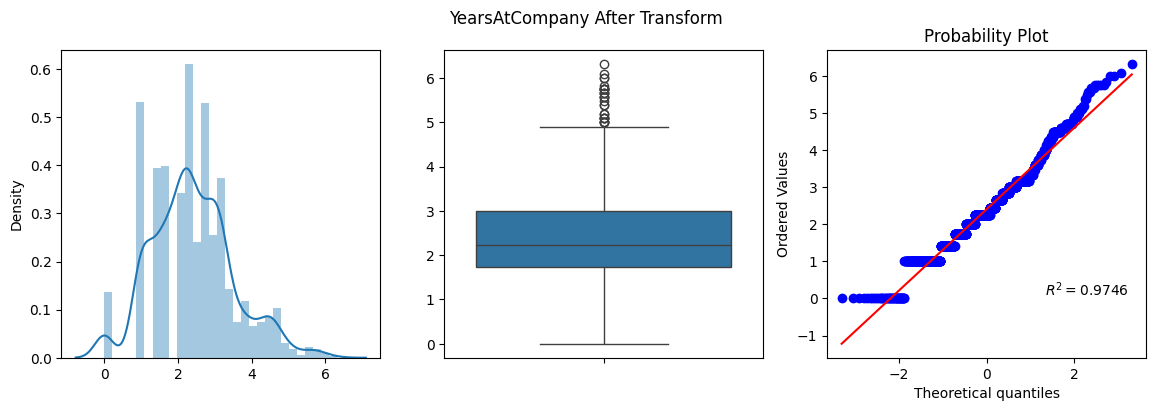

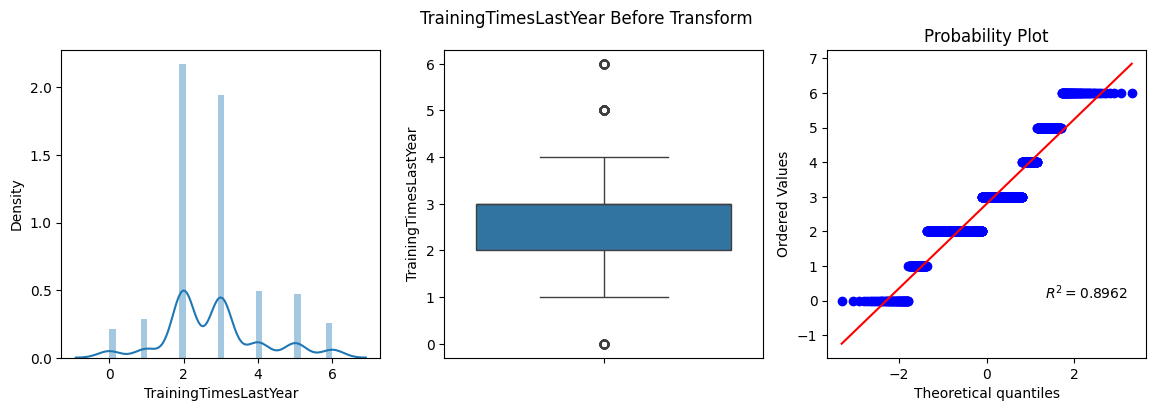

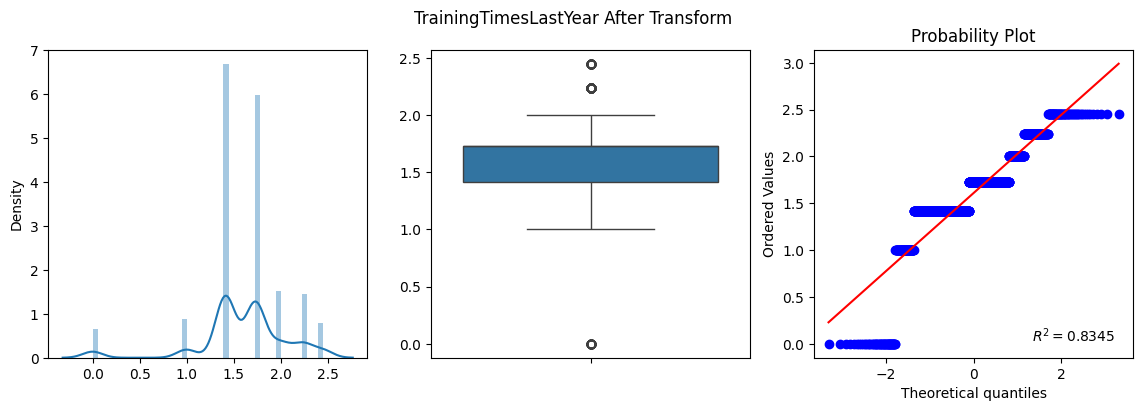

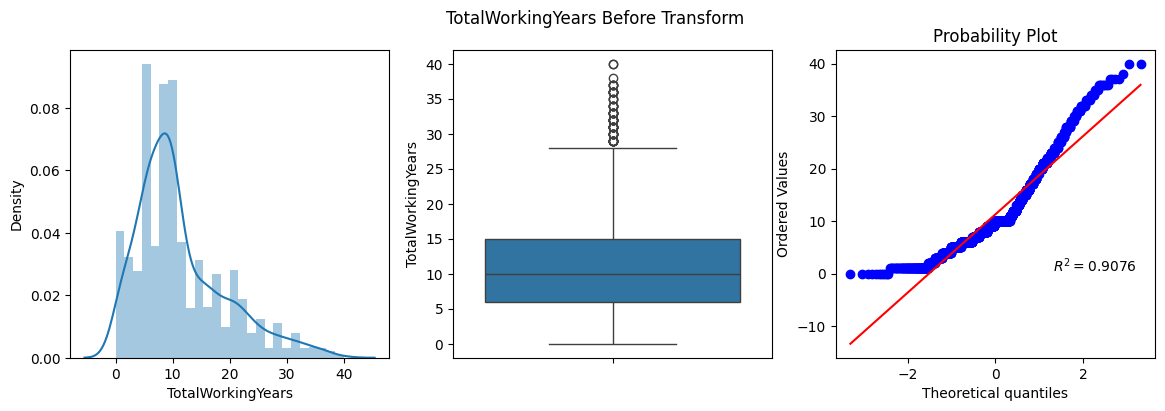

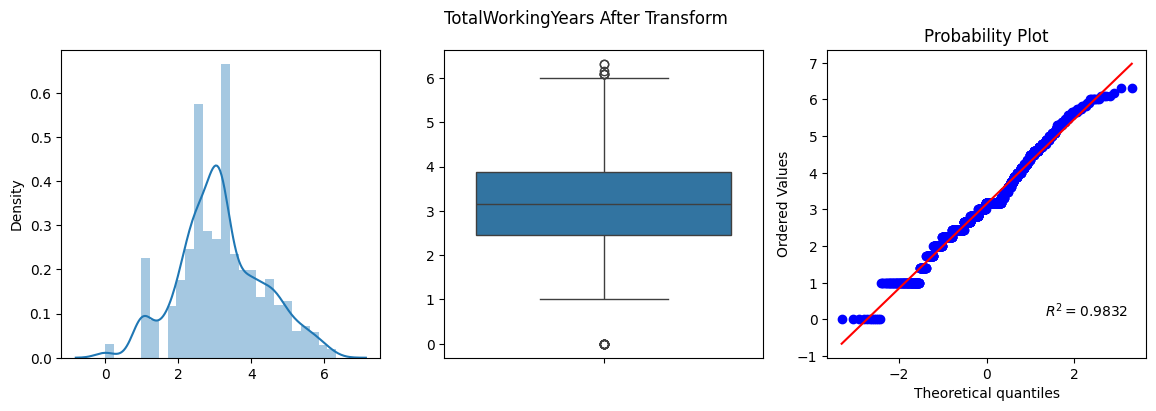

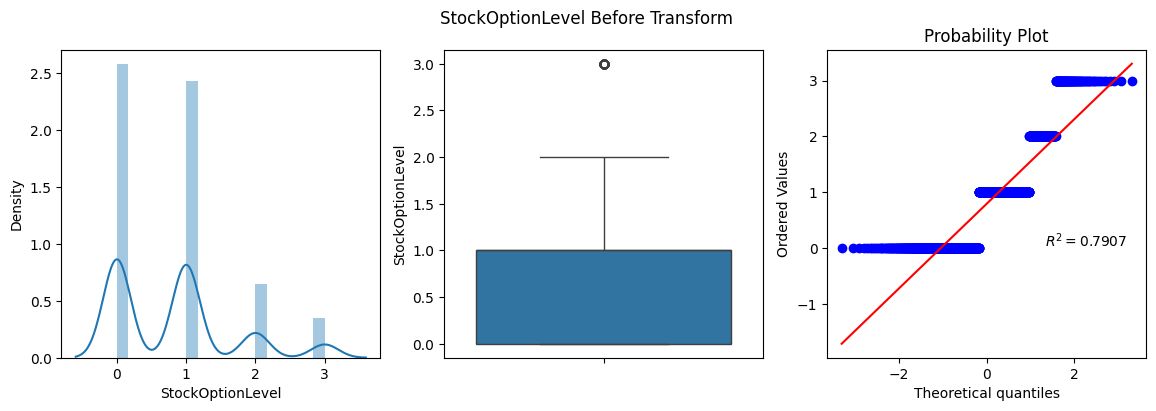

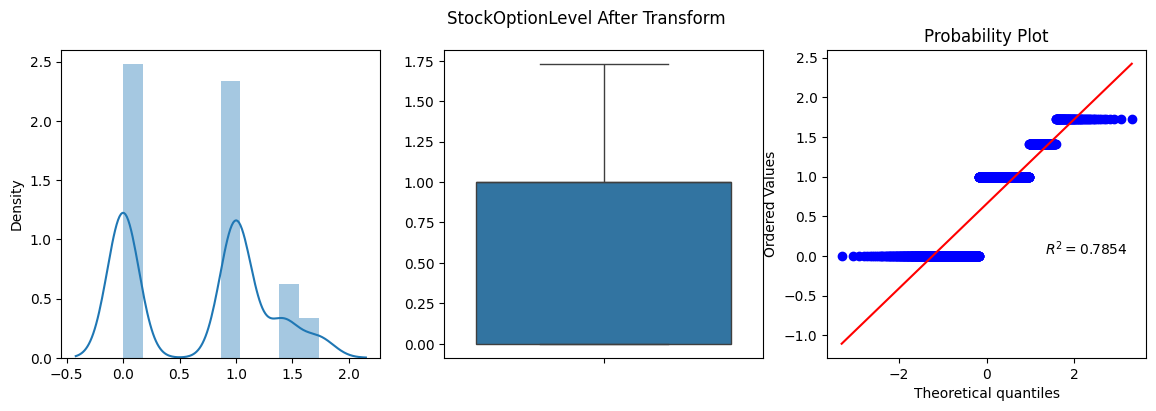

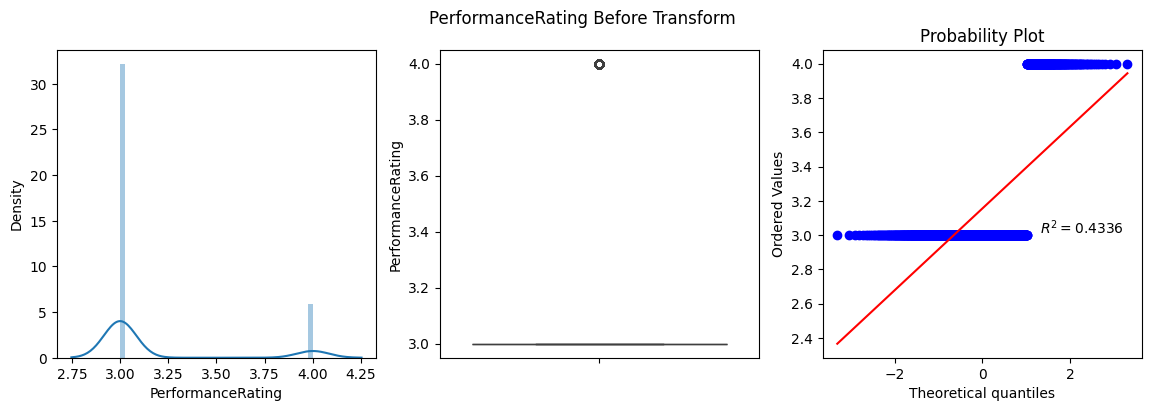

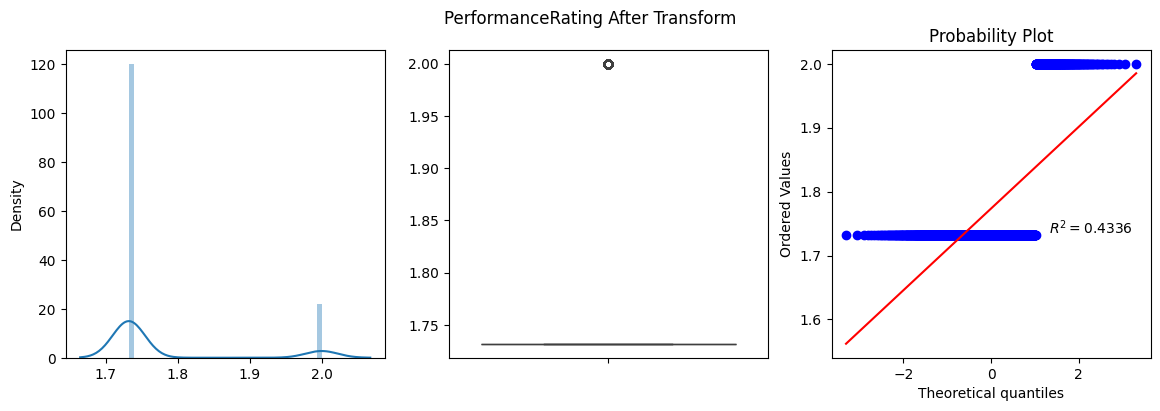

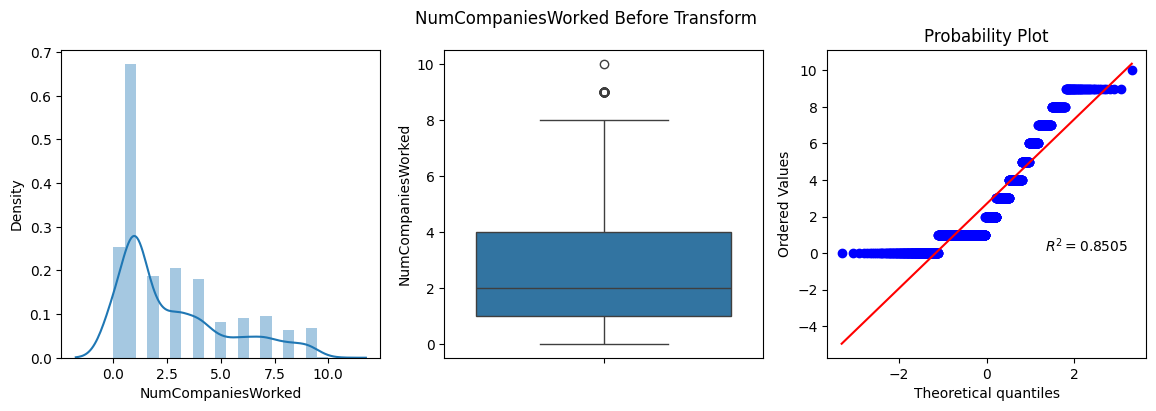

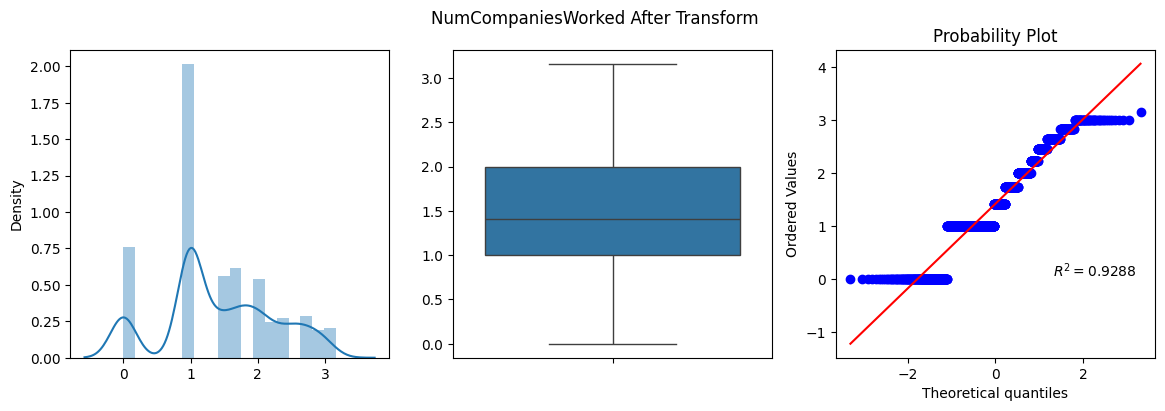

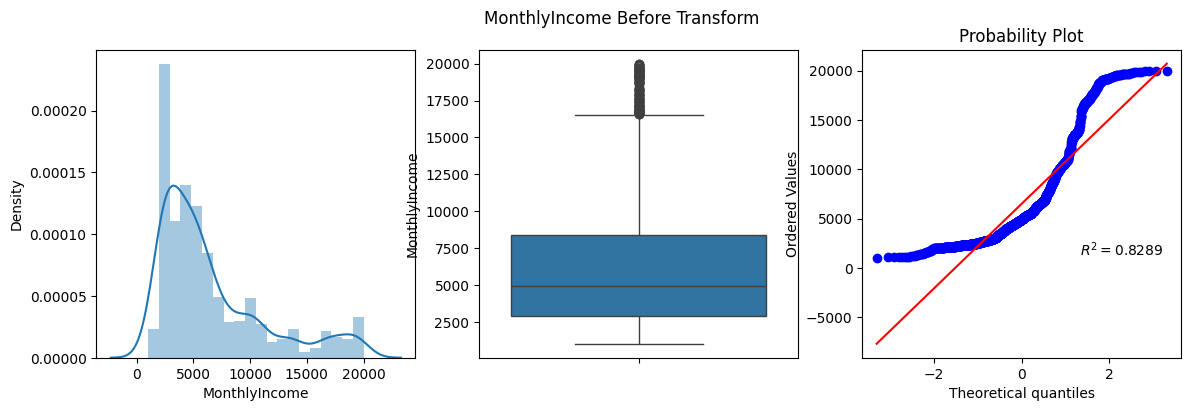

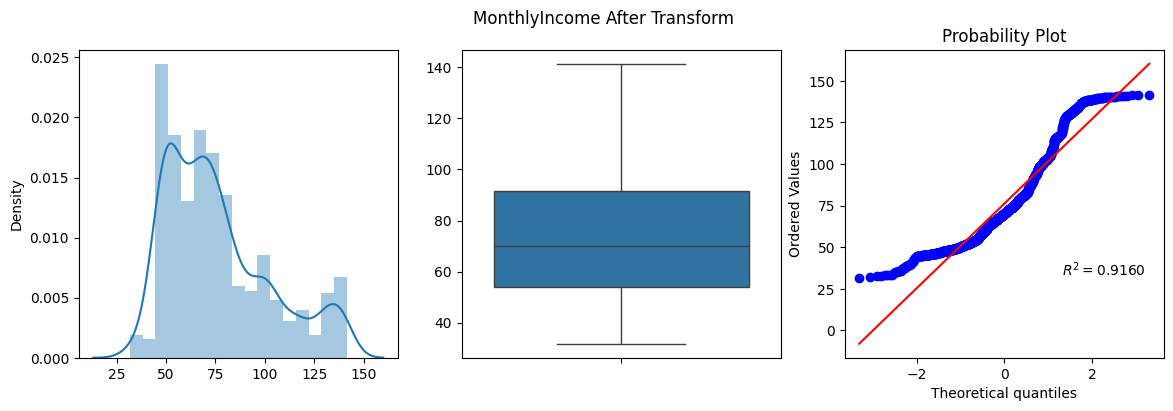

In [ ]:
# Square Root Transform
for col in skewed_cols:
    apply_transform(FunctionTransformer(np.sqrt),col)

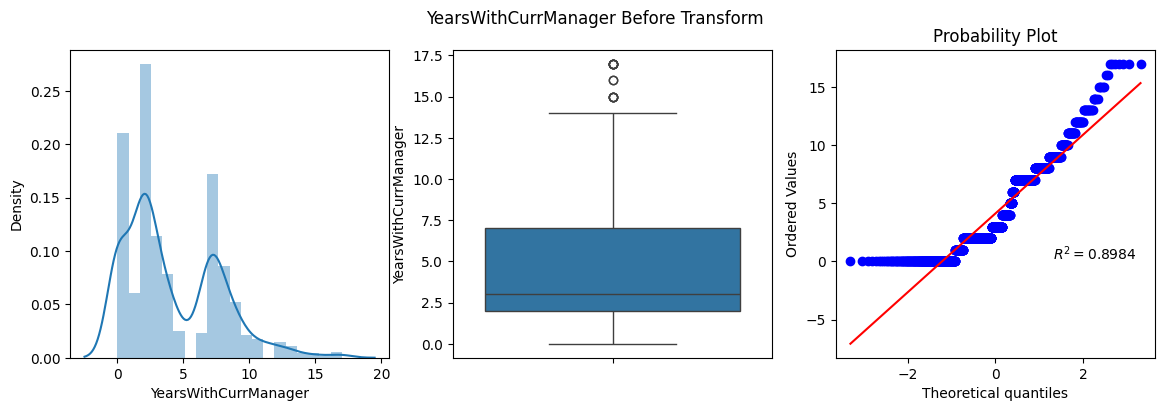

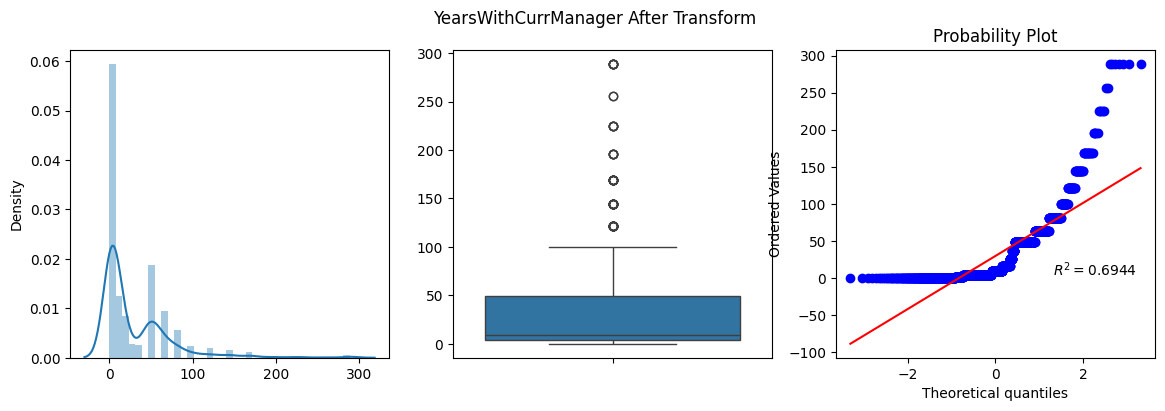

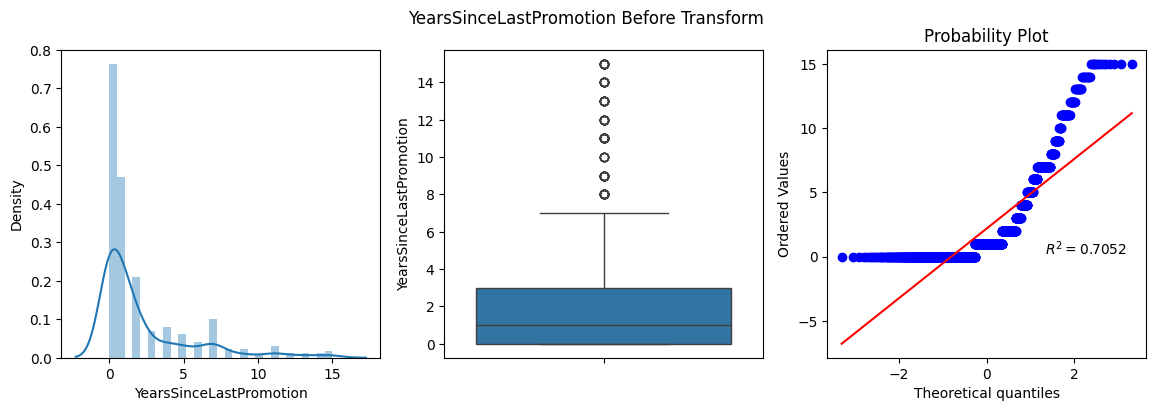

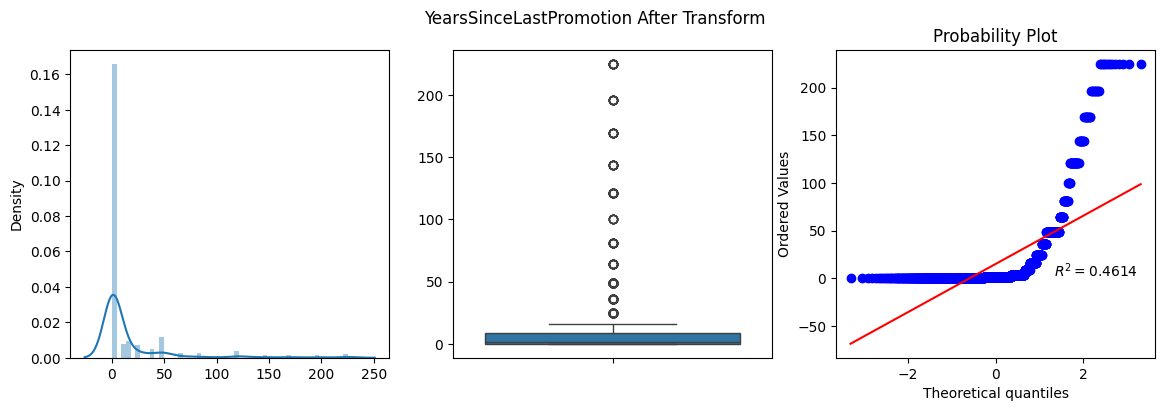

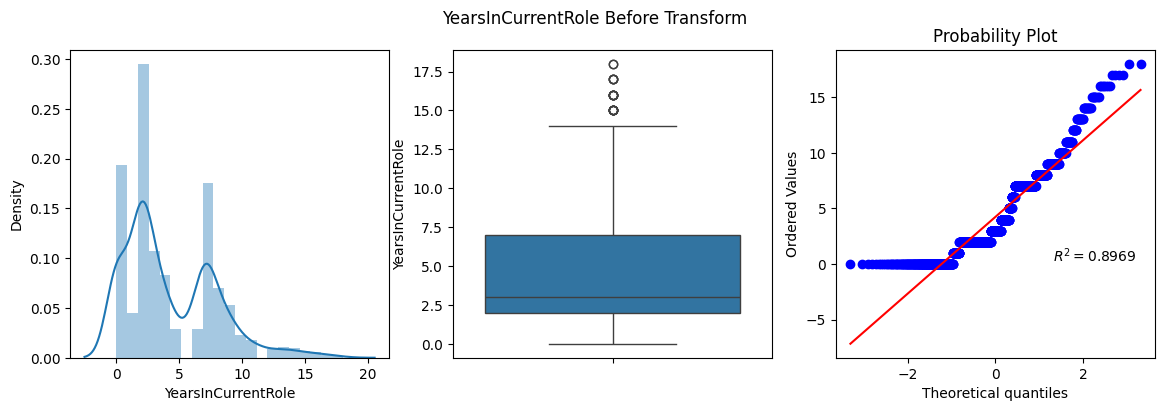

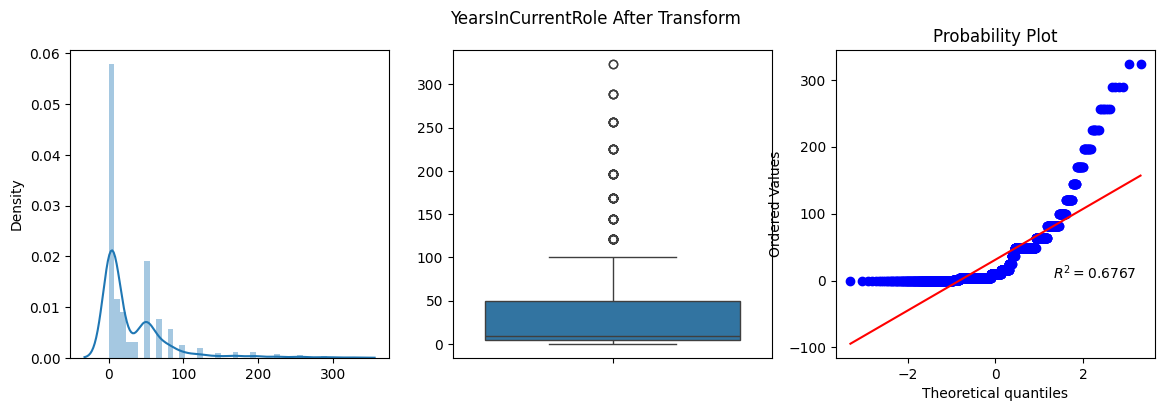

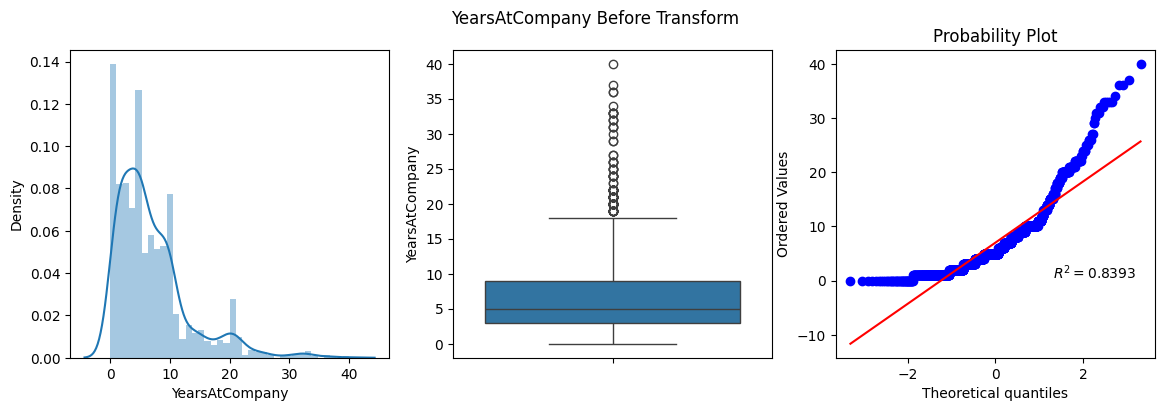

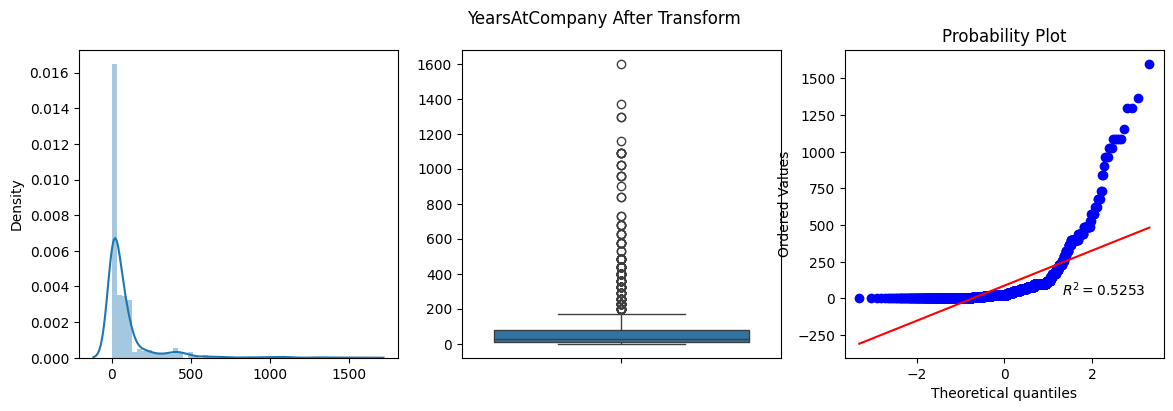

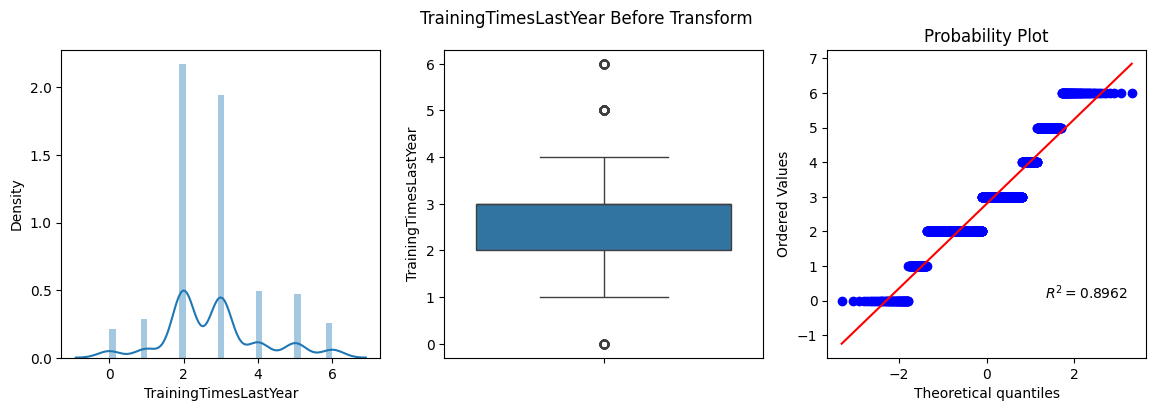

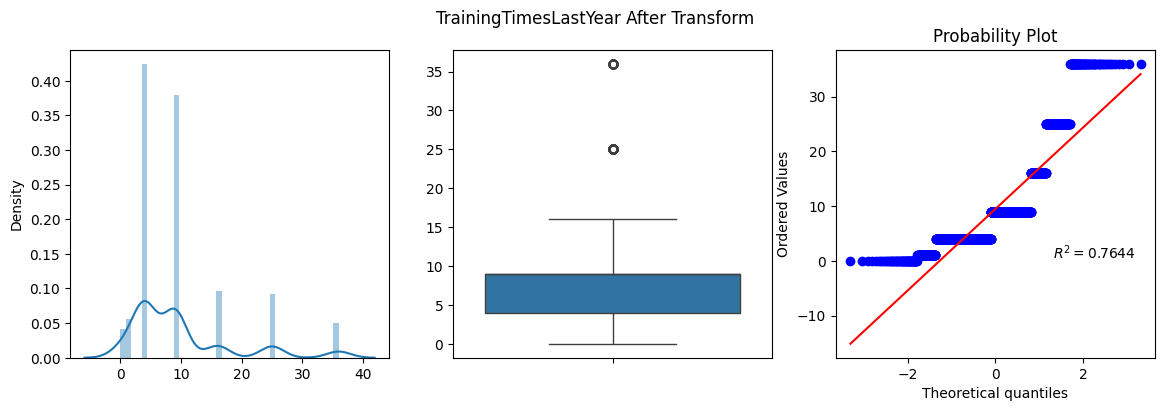

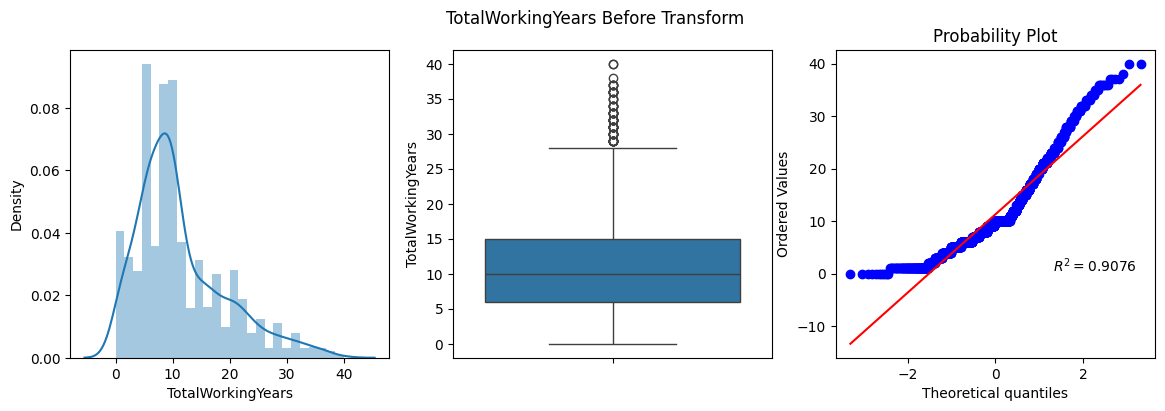

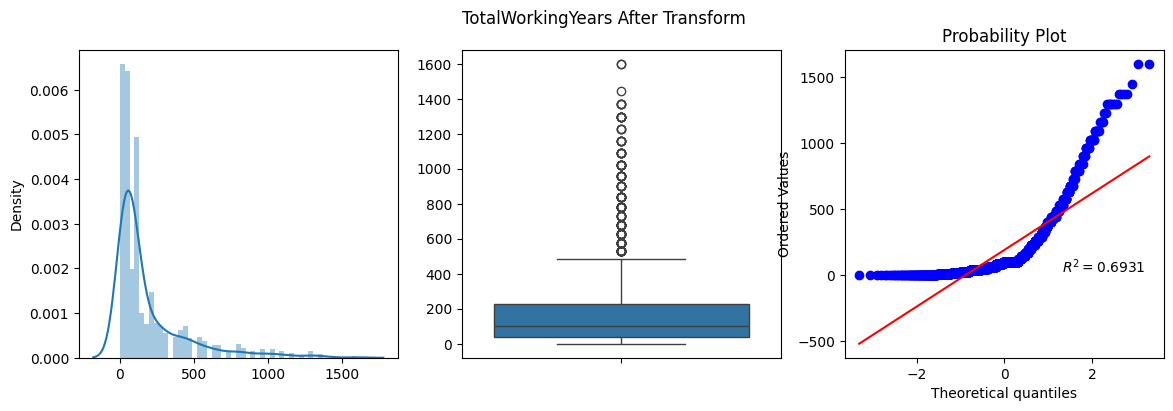

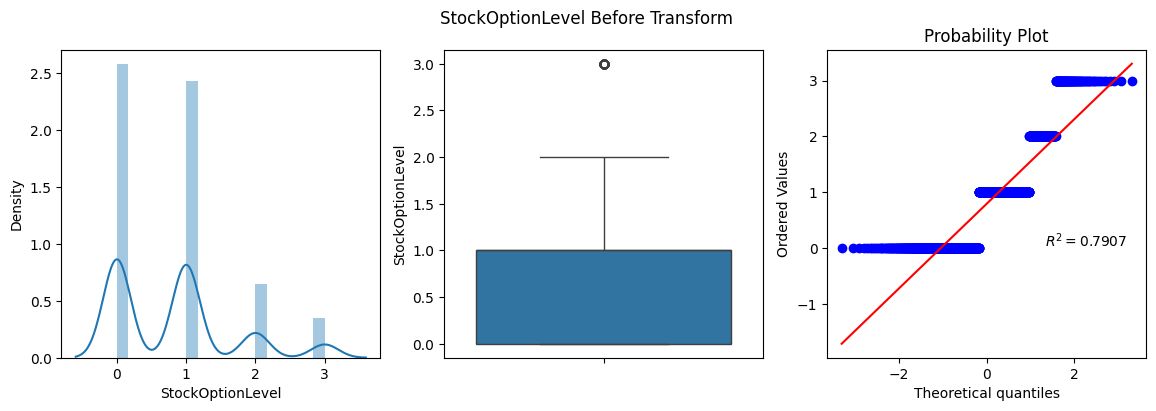

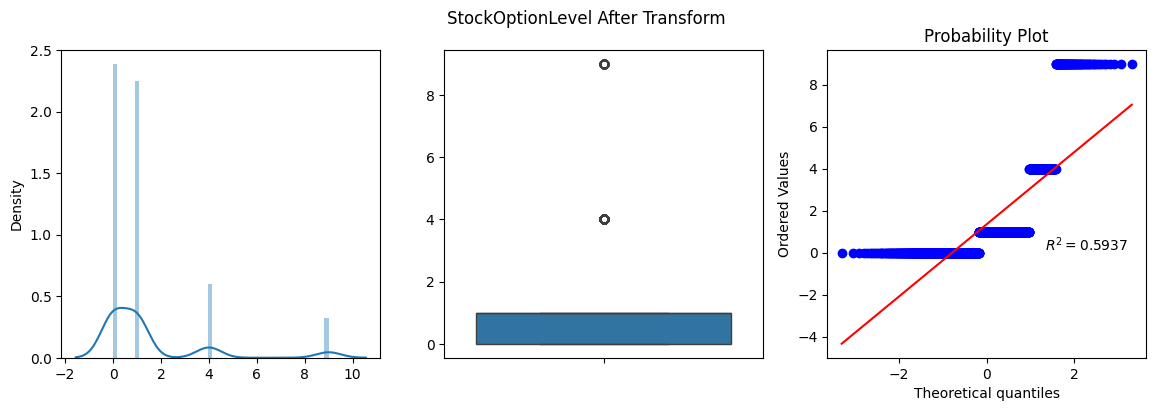

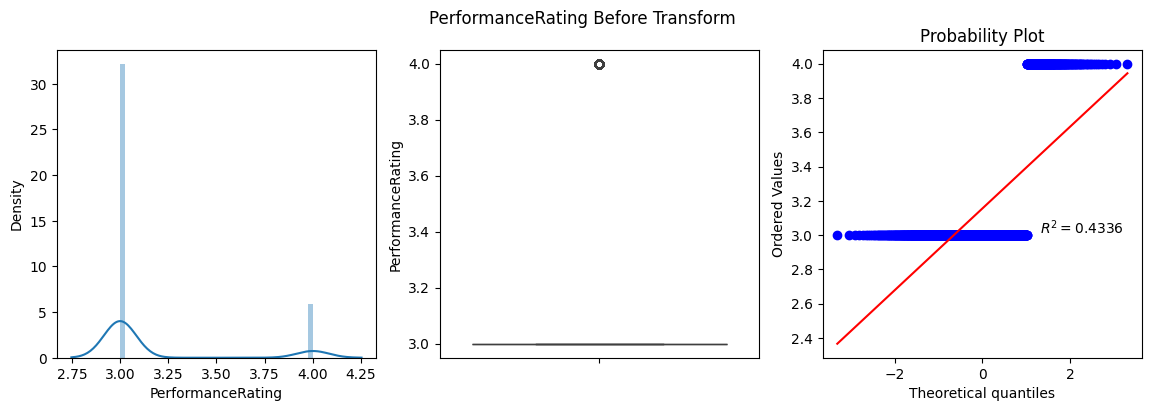

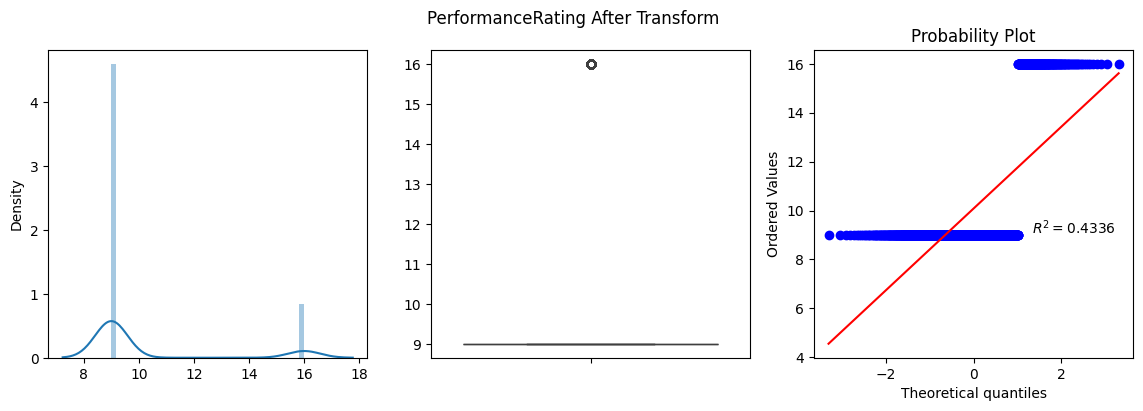

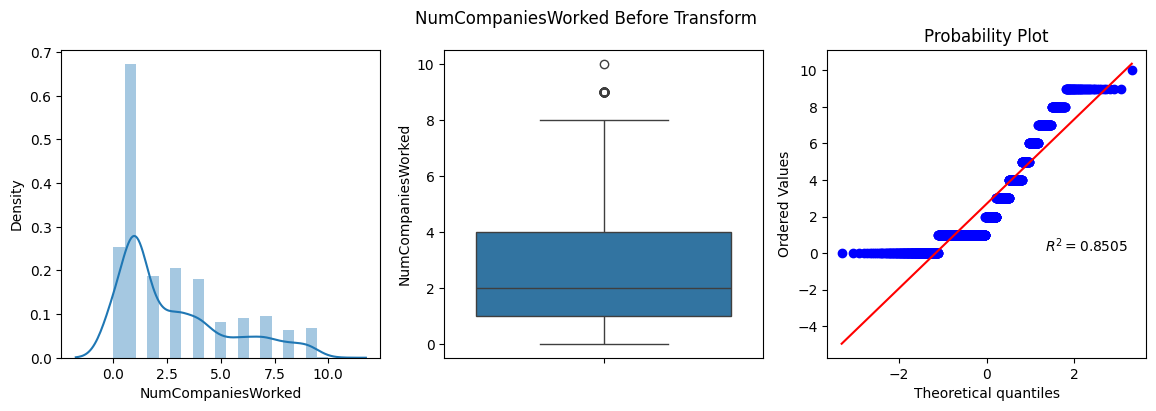

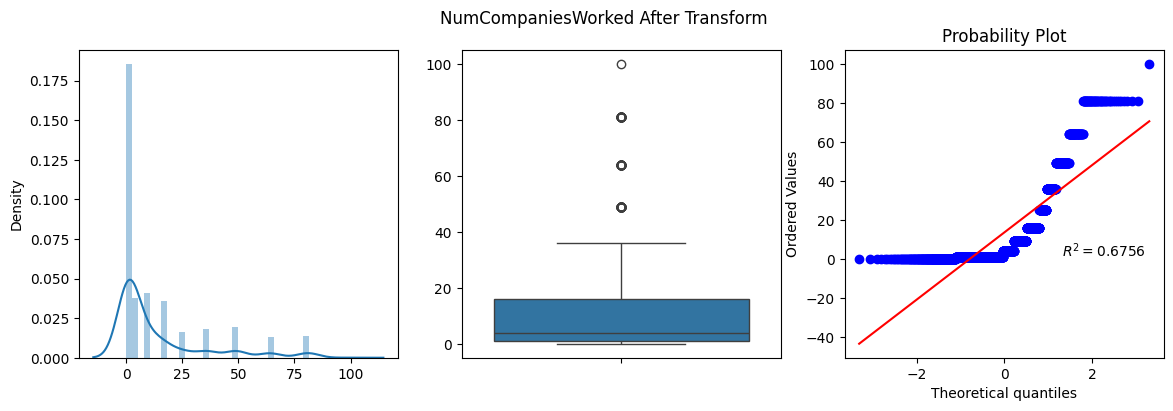

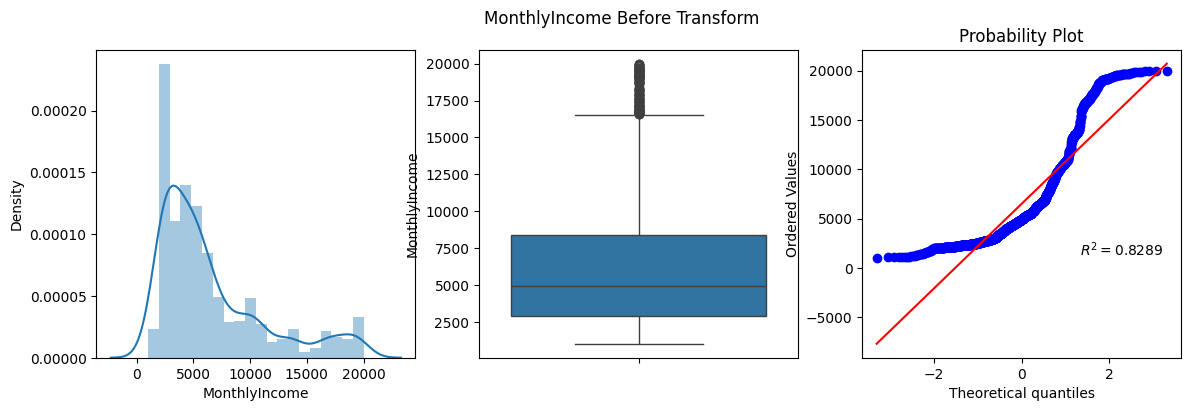

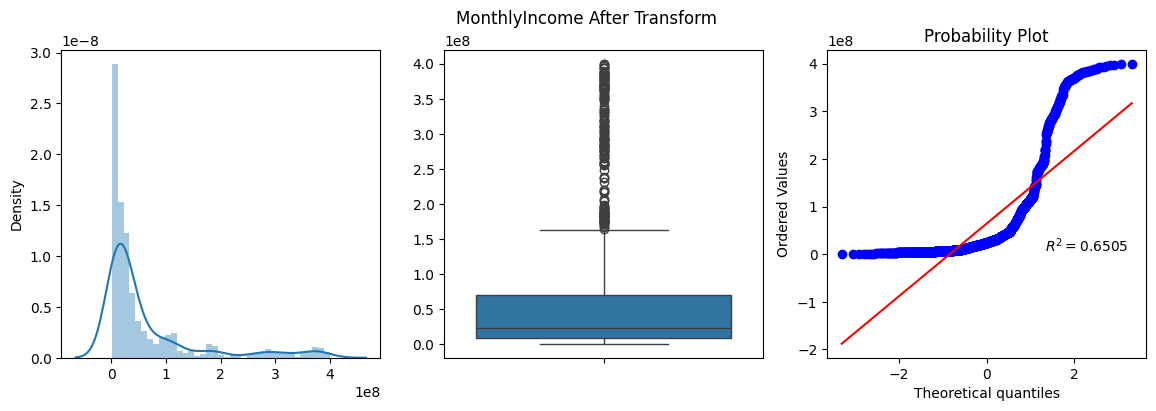

In [ ]:
# Square Transform
for col in skewed_cols:
    apply_transform(FunctionTransformer(np.square),col)

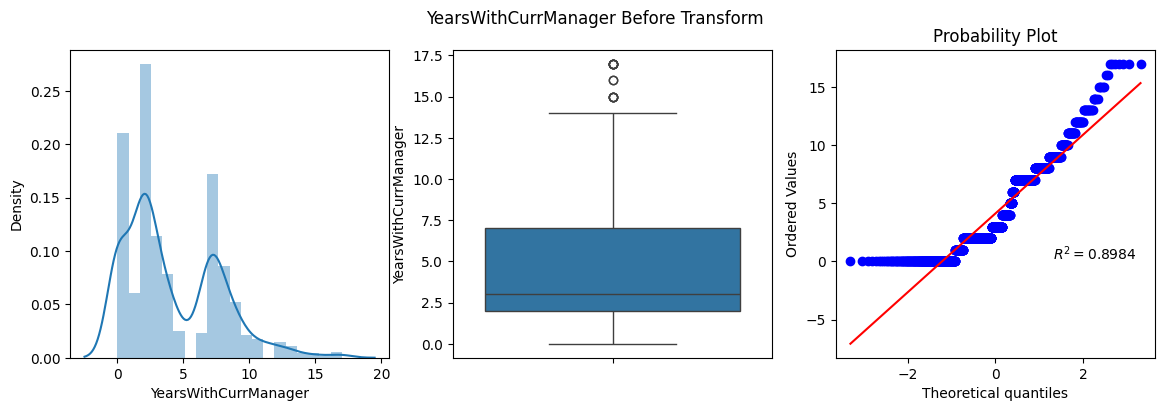

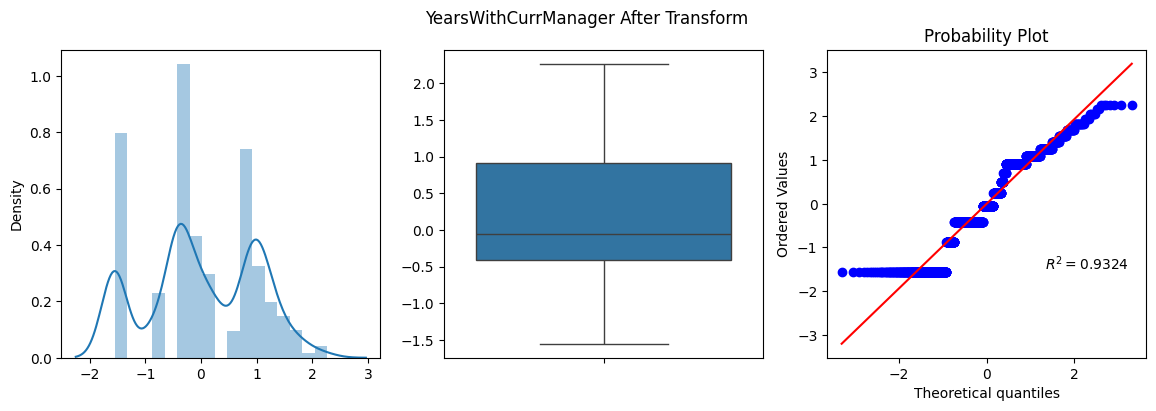

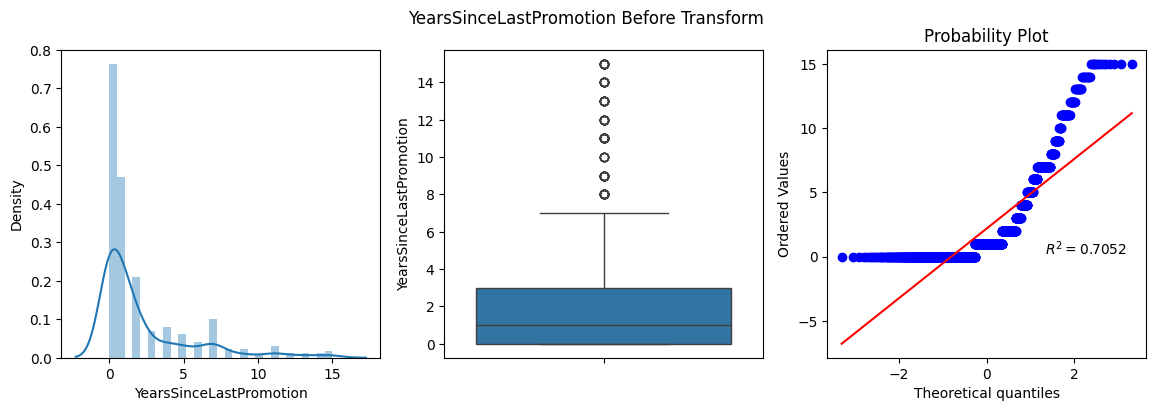

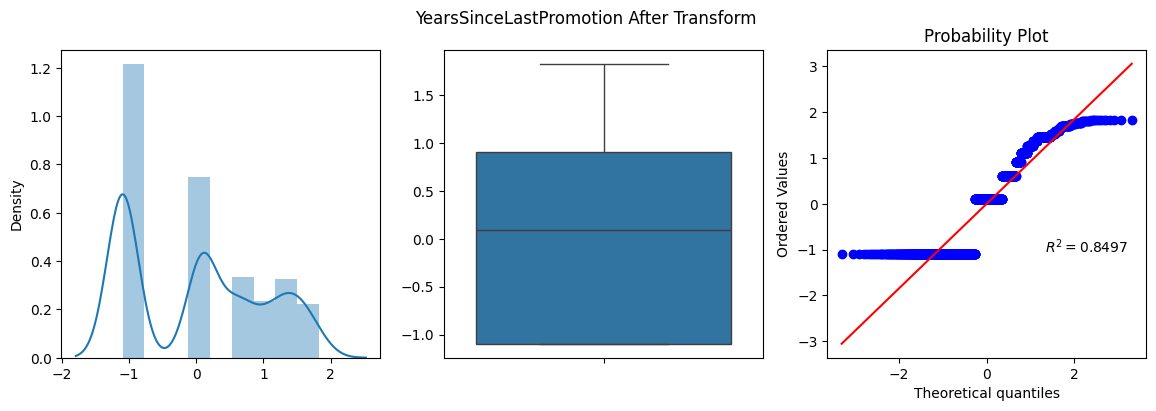

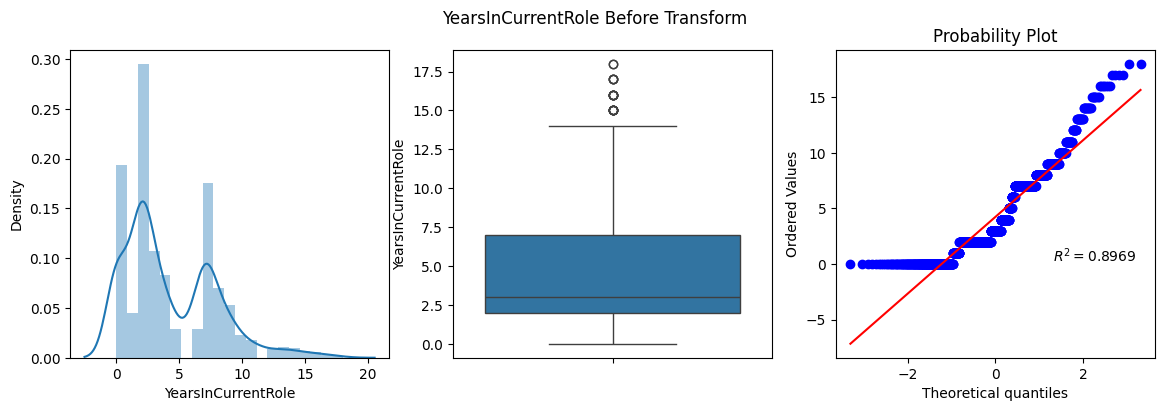

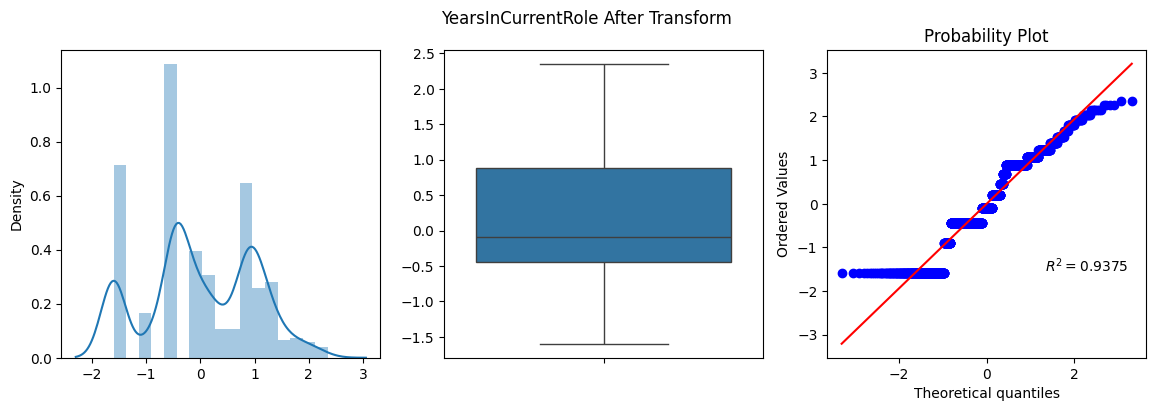

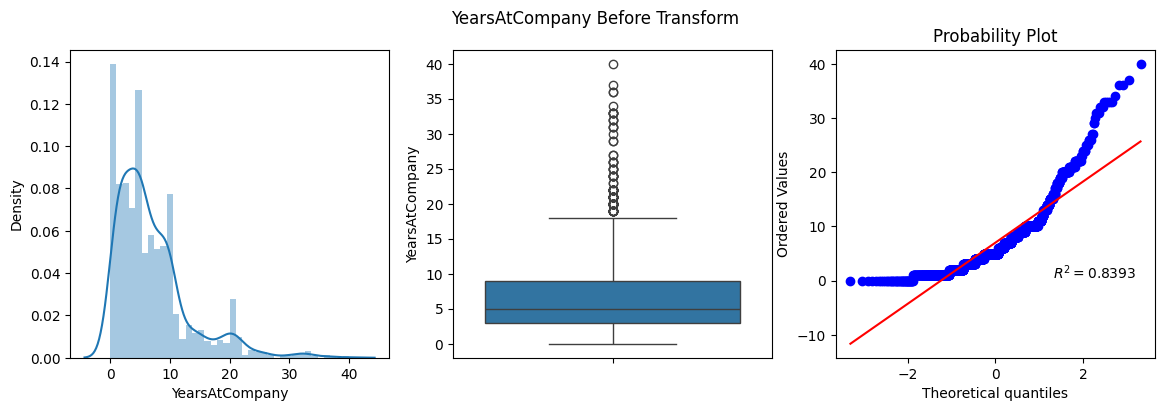

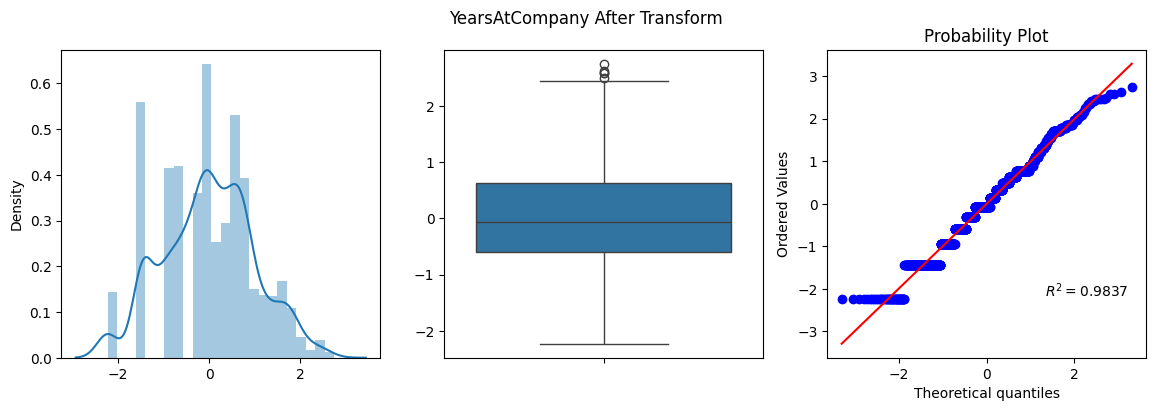

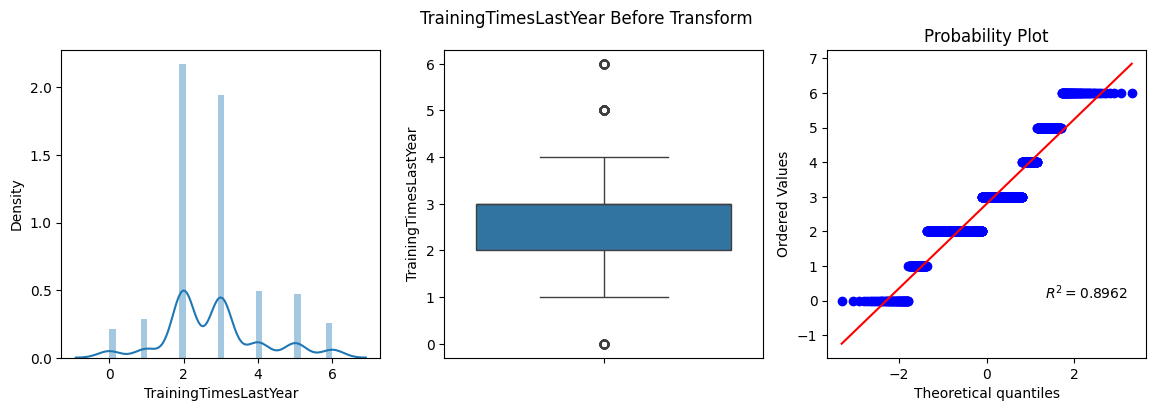

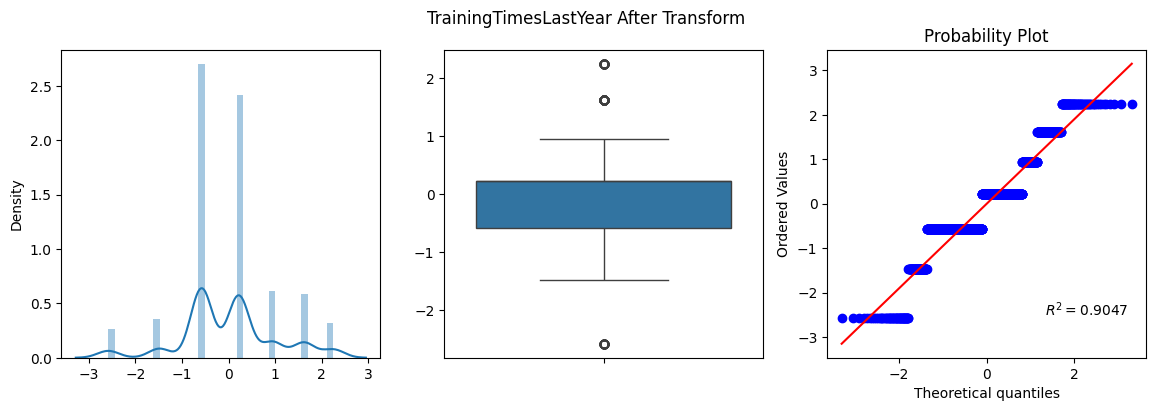

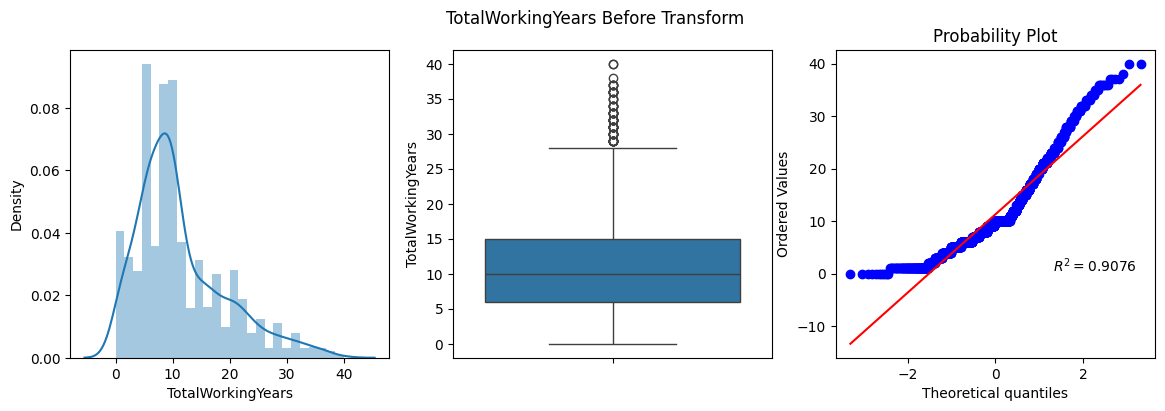

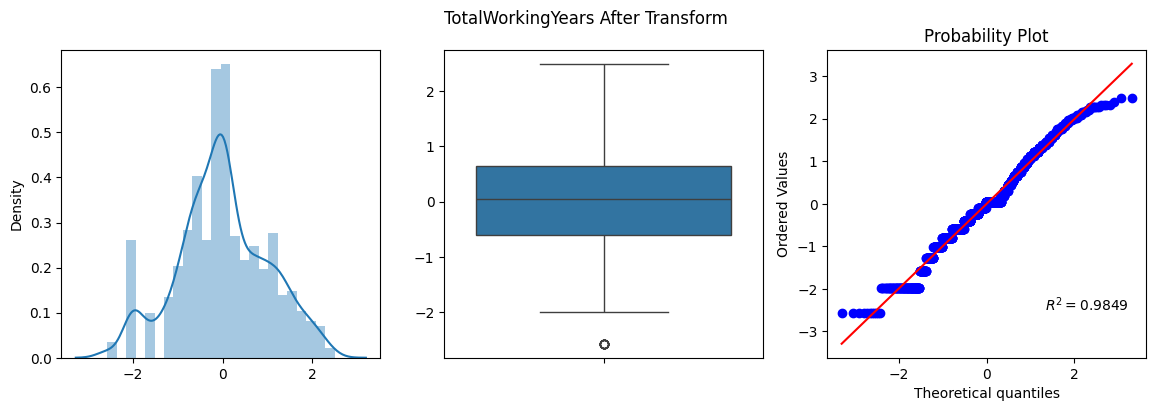

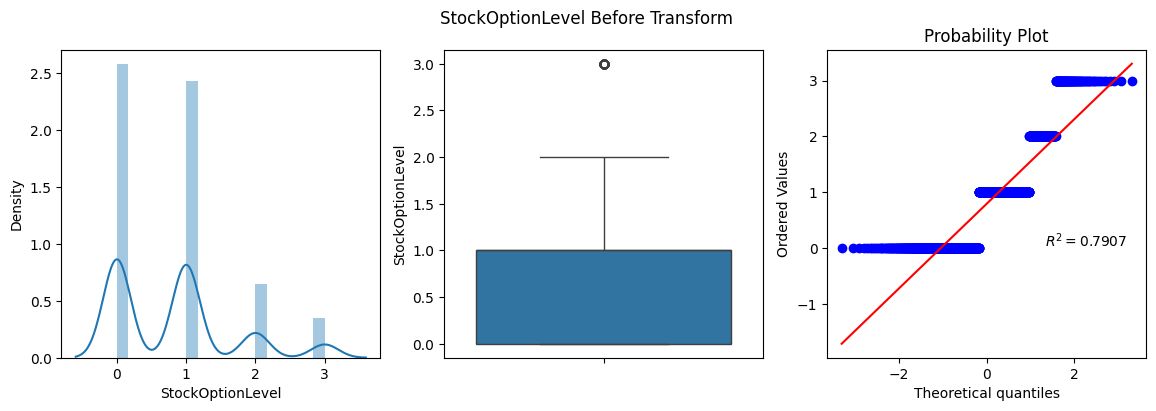

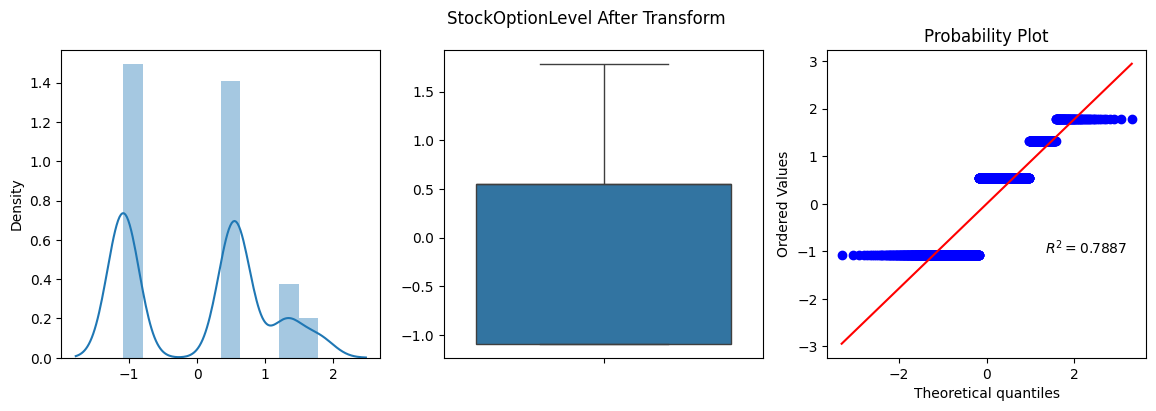

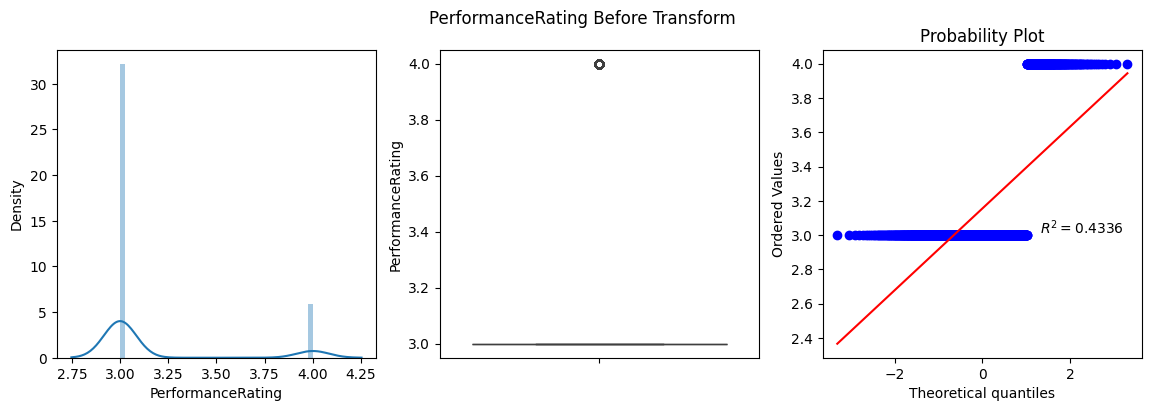

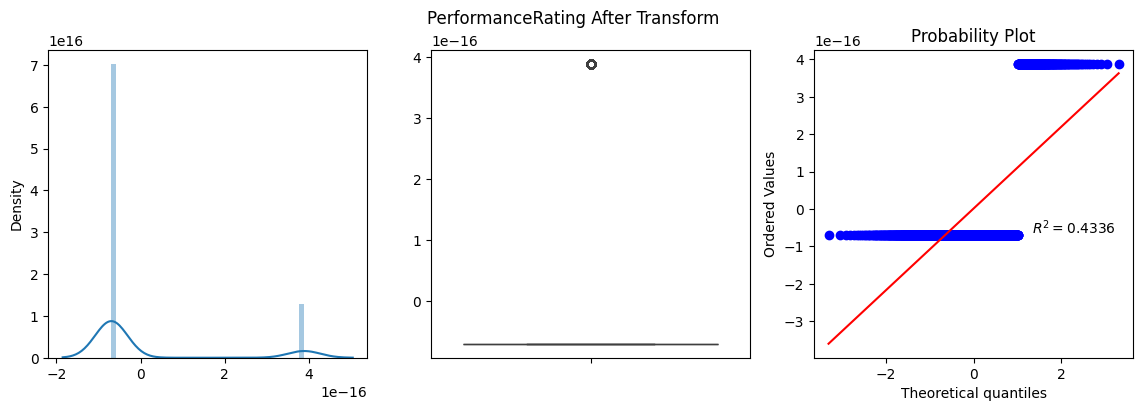

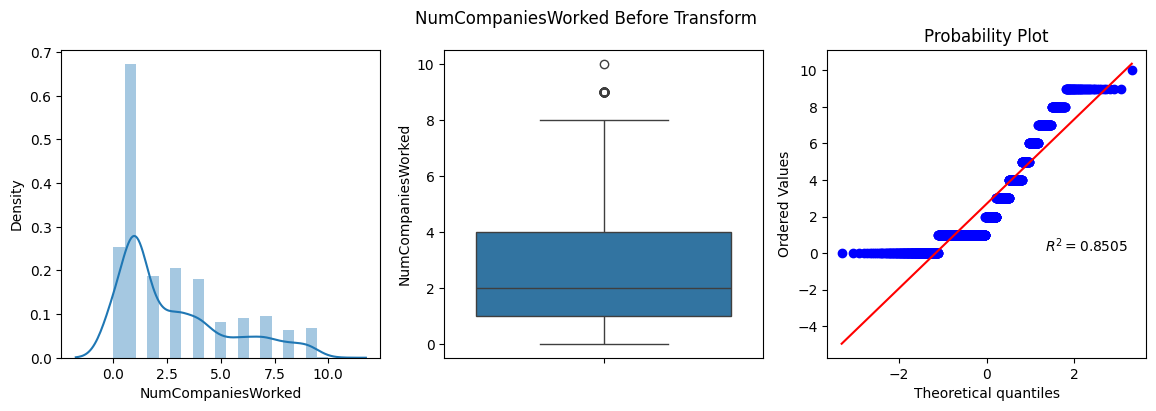

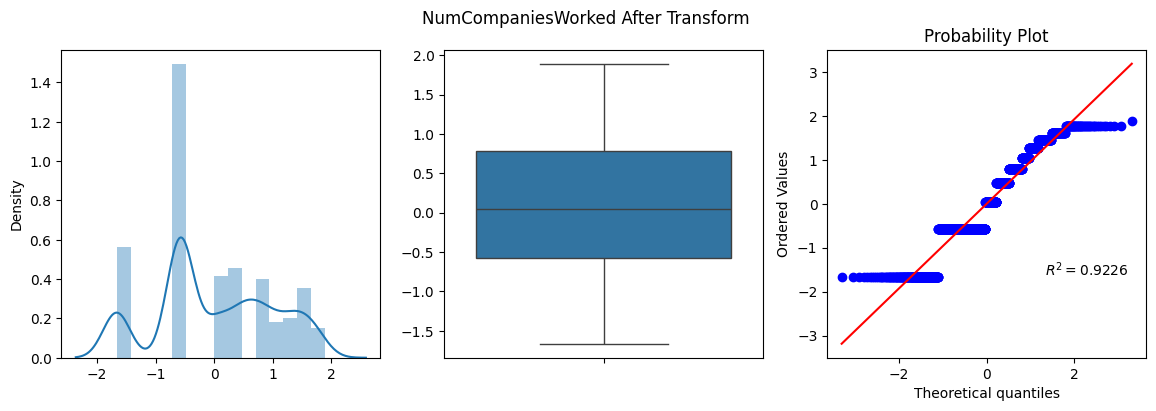

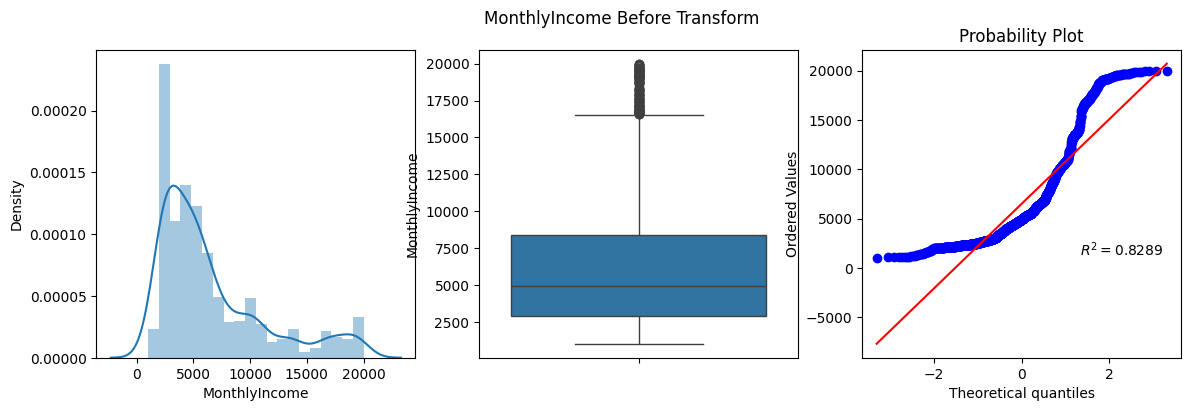

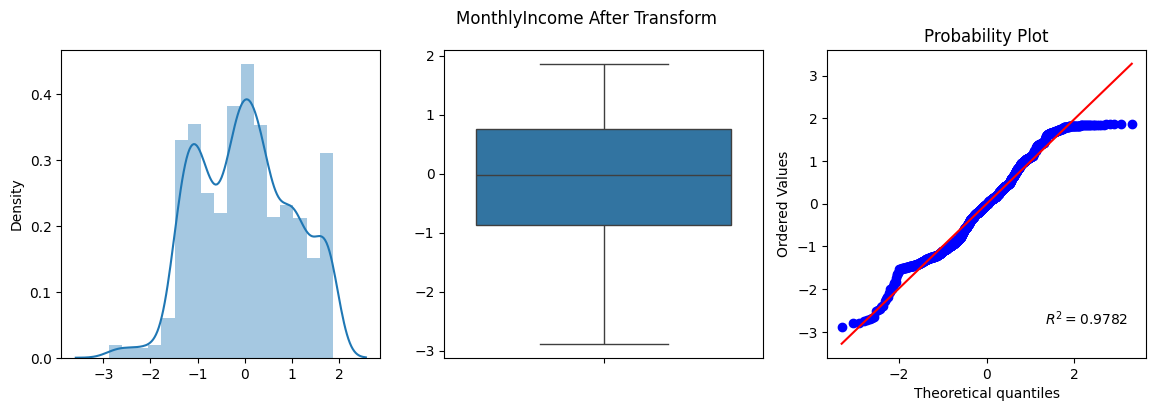

In [ ]:
# Power Transform
for col in skewed_cols:
    apply_transform(PowerTransformer(),col)

YearsWithCurrManager: Power Transform <br>
YearsSinceLastPromotion: Square Root Transform <br>
YearsInCurrentRole: Power Transform <br>
YearsAtCompany: Power Transform <br>
TrainingTimesLastYear: Power Transform <br>
TotalWorkingYears: Power Transform <br>
StockOptionLevel: Log Transform <br>
PerformanceRating: None <br>
NumCompaniesWorked: Square Root Transform <br>
MonthlyIncome: Power Transform

In [ ]:
skewed_cols.remove('PerformanceRating')

### Outlier Treatment

In [ ]:
def impute_outliers(data,col):
    winsorizer = Winsorizer(capping_method='iqr',fold=1.5,tail='both')
    fig = sns.boxplot(winsorizer.fit_transform(data[[col]]).values)
    plt.title(f"Box Plot of {col} after Outlier Removal")
    plt.show(fig)
    plt.close('all')
    del fig
    gc.collect()

In [ ]:
for col in skewed_cols:
    impute_outliers(df,col)

In [ ]:
winsorizer = Winsorizer(capping_method='iqr',tail='both',fold=1.5)

for col in skewed_cols:
    df[col] = winsorizer.fit_transform(df[[col]])

### Categorical Encoding

In [ ]:
df.select_dtypes(object).columns

In [ ]:
df.BusinessTravel.unique()

In [ ]:
df.Department.unique()

In [ ]:
df.EducationField.unique()

In [ ]:
df.Gender.unique()

In [ ]:
df.JobRole.unique()

In [ ]:
df.MaritalStatus.unique()

In [ ]:
df.Over18.unique()

In [ ]:
# Since all employees are adults, we can drop the feature "Over18" as it has 0 variance.
df.drop('Over18',axis=1,inplace=True)

In [ ]:
df.OverTime.unique()

In [ ]:
def onehotencode(data: pd.DataFrame,col: str) -> pd.DataFrame:
    encoder = OneHotEncoder(drop='first',sparse_output=False,max_categories=10)
    encoded_data = encoder.fit_transform(data[[col]])
    encoded_data = pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out())
    return encoded_data

In [ ]:


def onehotencode(data: pd.DataFrame,col: str) -> pd.DataFrame:
    encoder = OneHotEncoder(drop='first',max_categories=10) # Remove sparse_output
    encoded_data = encoder.fit_transform(data[[col]])
    # Convert the encoded data to a dense array
    encoded_data = encoded_data.toarray()
    encoded_data = pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out())
    return encoded_data

onehotencode_cols = ['OverTime','MaritalStatus','JobRole','Gender','EducationField','Department','BusinessTravel']

for col in onehotencode_cols:
    encoded_data = onehotencode(df,col)
    df = pd.concat([df,encoded_data],axis=1)
    df.drop(col,axis=1,inplace=True)

### Label Encoding

In [ ]:
target_encoder = LabelEncoder()
df['Attrition'] = target_encoder.fit_transform(df['Attrition'])
df['Attrition']

In [ ]:
label_mapping = {}

for idx, label in enumerate(target_encoder.classes_):
    label_mapping[idx] = label

label_mapping

### Feature Splitting

In [ ]:
X = df.drop('Attrition',axis=1)
y = df['Attrition']

### Handling imbalanced target labels

In [ ]:
smote = BorderlineSMOTE()
X, y = smote.fit_resample(X,y)

In [ ]:
plt.figure(figsize=(8,4))
fig = sns.countplot(y)
plt.tight_layout()
plt.show(fig)
plt.close('all')
del fig
gc.collect();

In [ ]:
print(Counter(y))

In [ ]:
X.shape

### Performing train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,shuffle=True,random_state=75)

### Feature Selection

In [ ]:
pipeline = Pipeline(steps=[
    ('constant',DropConstantFeatures()),
    ('duplicate',DropDuplicateFeatures()),
    ('correlated',DropCorrelatedFeatures())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
kbest = SelectKBest(k=10,score_func=chi2)
kbest.fit(X_train,y_train)

In [ ]:
selected_features = kbest.get_feature_names_out()
selected_features

In [ ]:
perc = SelectPercentile(percentile=20,score_func=chi2)
perc.fit(X_train,y_train)

In [ ]:
selected_features = perc.get_feature_names_out()
selected_features

In [ ]:
lasso = SelectFromModel(estimator=Lasso(),max_features=10)
lasso.fit(X_train,y_train)

In [ ]:
selected_features = lasso.get_feature_names_out()
selected_features

In [ ]:
rf = RFE(estimator=RandomForestClassifier(),n_features_to_select=10,step=2,verbose=2)
rf.fit(X_train,y_train)

In [ ]:
selected_features = rf.get_feature_names_out()
selected_features

In [ ]:
sfs = SequentialFeatureSelector(estimator=RandomForestClassifier(),n_features_to_select=10,direction='forward')
sfs.fit(X_train,y_train)

In [ ]:
selected_features = sfs.get_feature_names_out()
selected_features

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

In [ ]:
def plot_feature_importances(feat_imp_type):
    feat_imps = xgb.get_booster().get_score(importance_type=feat_imp_type)
    keys = list(feat_imps.keys())
    values = list(feat_imps.values())
    feat_imps_df = pd.DataFrame(data=values, index=keys, columns=["Importance"]).sort_values(by="Importance", ascending=False).reset_index()
    feat_imps_df.rename({'index': 'Feature'},axis=1,inplace=True)
    plt.figure(figsize=(12,8))
    fig = sns.barplot(x='Importance',y='Feature',data=feat_imps_df,orient='horizontal',palette='viridis')
    plt.title(f"{feat_imp_type.title()} Feature Importance")
    plt.show(fig)
    plt.close('all')
    del fig
    gc.collect();

In [ ]:
plot_feature_importances('gain')

In [ ]:
plot_feature_importances('weight')

In [ ]:
plot_feature_importances('cover')

In [ ]:
plot_feature_importances('total_gain')

In [ ]:
plot_feature_importances('total_cover')

In [ ]:
final_selected_features = ['Age','DailyRate','DistanceFromHome','JobLevel','MonthlyRate','OverTime_Yes','YearsAtCompany','TotalWorkingYears','MaritalStatus_Single','StockOptionLevel']
len(final_selected_features)

In [ ]:
final_X_train = X_train[final_selected_features]
final_X_test = X_test[final_selected_features]

In [ ]:
gc.collect()

In [ ]:
for col in final_X_train.columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(final_X_train[col])
    plt.suptitle(col)
    plt.show()

In [ ]:
outlier_cols = ['TotalWorkingYears','Age','JobLevel','YearsAtCompany']

for col in outlier_cols:
    impute_outliers(final_X_train,col)

In [ ]:
winsorizer = Winsorizer(capping_method='iqr',tail='both',fold=1.5)

for col in outlier_cols:
    final_X_train[col] = winsorizer.fit_transform(final_X_train[[col]])
    final_X_test[col] = winsorizer.transform(final_X_test[[col]])

In [ ]:
for col in outlier_cols:
    impute_outliers(final_X_test,col)

### Feature Scaling

In [ ]:
scaler = StandardScaler()
final_X_train = scaler.fit_transform(final_X_train)
final_X_train = pd.DataFrame(final_X_train,columns=final_selected_features)
final_X_test = scaler.transform(final_X_test)
final_X_test = pd.DataFrame(final_X_test,columns=final_selected_features)
final_X_train.head()

In [ ]:
final_X_test.head()